#### Data Import and Preparation:

Import data. 

Figure out the primary key and look for the requirement of indexing.

Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.

#### Exploratory Data Analysis (EDA):

4. Perform debt analysis. You may take the following steps:

     i.Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent

     ii.Use the following bad debt equation:

    Bad Debt = P (Second Mortgage ∩ Home Equity Loan)
    Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage
     iii.Create pie charts  to show overall debt and bad debt

     iv.Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

     v. Create a collated income distribution chart for family income, house hold income, and remaining income

5. Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements): 

     i.Use pop and ALand variables to create a new field called population density

     ii.Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age

     iii.Visualize the findings using appropriate chart type

6. Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

     i. Analyze the married, separated, and divorced population for these population brackets

     ii. Visualize using appropriate chart type

7. Please detail your observations for rent as a percentage of income at an overall level, and for different states.

8. Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.

### Import data:
### Dataset preparation:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as no
print("All libraries imported")

All libraries imported


In [2]:
train_ds = pd.read_csv("Real_estate_train.csv")
test_ds = pd.read_csv("Real_estate_test.csv")

In [3]:
train_ds.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [4]:
test_ds.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
3,248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
4,286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


In [5]:
train_ds.shape

(27321, 80)

In [6]:
test_ds.shape

(11709, 80)

Figure out the primary key and look for the requirement of indexing.

In [7]:
train_ds.set_index(keys=['UID'], inplace=True)
test_ds.set_index(keys=['UID'],inplace=True)  

UID is the unique value for each row, so this is our Primary Key , this can be used as row index

In [8]:
train_ds.head()

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,tract,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


sumlevel is always 140 which does not give us any information for prediction so we can drop it

In [9]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27321 entries, 267822 to 265371
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BLOCKID                      0 non-null      float64
 1   SUMLEVEL                     27321 non-null  int64  
 2   COUNTYID                     27321 non-null  int64  
 3   STATEID                      27321 non-null  int64  
 4   state                        27321 non-null  object 
 5   state_ab                     27321 non-null  object 
 6   city                         27321 non-null  object 
 7   place                        27321 non-null  object 
 8   type                         27321 non-null  object 
 9   primary                      27321 non-null  object 
 10  zip_code                     27321 non-null  int64  
 11  area_code                    27321 non-null  int64  
 12  lat                          27321 non-null  float64
 13  lng       

In [10]:
train_ds.describe()

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,AWater,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
count,0.0,27321.0,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,2.732100e+04,2.732100e+04,...,27115.000000,27115.000000,27115.000000,27115.000000,27115.000000,27053.000000,27130.000000,27130.000000,27130.000000,27130.000000
mean,NaN,140.0,85.646426,28.271806,50081.999524,596.507668,37.508813,-91.288394,1.295106e+08,6.521754e+06,...,40.319803,40.355099,22.178745,544.238432,2208.761903,0.640434,0.508300,0.047537,0.019089,0.100248
std,NaN,0.0,98.333097,16.392846,29558.115660,232.497482,5.588268,16.343816,1.275531e+09,2.186781e+08,...,5.886317,8.039585,2.540257,283.546896,1089.316999,0.226640,0.136860,0.037640,0.020796,0.049055
min,NaN,140.0,1.000000,1.000000,602.000000,201.000000,17.929085,-165.453872,4.113400e+04,0.000000e+00,...,16.008330,13.250000,0.556780,0.664700,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,140.0,29.000000,13.000000,26554.000000,405.000000,33.899064,-97.816067,1.799408e+06,0.000000e+00,...,36.892050,34.916670,21.312135,355.995825,1471.000000,0.502780,0.425102,0.020810,0.004530,0.065800
50%,NaN,140.0,63.000000,28.000000,47715.000000,614.000000,38.755183,-86.554374,4.866940e+06,2.756300e+04,...,40.373320,40.583330,22.514410,503.643890,2066.000000,0.690840,0.526665,0.038840,0.013460,0.095205
75%,NaN,140.0,109.000000,42.000000,77093.000000,801.000000,41.380606,-79.782503,3.359820e+07,5.239880e+05,...,43.567120,45.416670,23.575260,680.275055,2772.000000,0.817460,0.605760,0.065100,0.027488,0.129000
max,NaN,140.0,840.000000,72.000000,99925.000000,989.000000,67.074017,-65.379332,1.039510e+11,2.453228e+10,...,79.837390,82.250000,30.241270,6197.995200,27250.000000,1.000000,1.000000,0.714290,0.714290,1.000000


In [11]:
train_ds.isnull().sum()[train_ds.isnull().sum()>0] #show only the columns which has missing values

BLOCKID                        27321
rent_mean                        314
rent_median                      314
rent_stdev                       314
rent_sample_weight               314
rent_samples                     314
rent_gt_10                       314
rent_gt_15                       314
rent_gt_20                       314
rent_gt_25                       314
rent_gt_30                       314
rent_gt_35                       314
rent_gt_40                       314
rent_gt_50                       314
hi_mean                          268
hi_median                        268
hi_stdev                         268
hi_sample_weight                 268
hi_samples                       268
family_mean                      298
family_median                    298
family_stdev                     298
family_sample_weight             298
family_samples                   298
hc_mortgage_mean                 573
hc_mortgage_median               573
hc_mortgage_stdev                573
h

"BLOCKID" does not have any entry it is entirely empty, we should drop it

"SUMLEVEL" is always 140, so it does not have any predictive power, we should drop it

"Primary" is always tract, does not have any predictive capability, we should drop it

In [12]:
train_ds.drop(columns=['BLOCKID', 'SUMLEVEL', 'primary'], inplace=True)
test_ds.drop(columns=['BLOCKID','SUMLEVEL', 'primary'], inplace=True)

In [13]:
test_ds.isnull().sum()[test_ds.isnull().sum()>0]

rent_mean                      148
rent_median                    148
rent_stdev                     148
rent_sample_weight             148
rent_samples                   148
rent_gt_10                     149
rent_gt_15                     149
rent_gt_20                     149
rent_gt_25                     149
rent_gt_30                     149
rent_gt_35                     149
rent_gt_40                     149
rent_gt_50                     149
hi_mean                        122
hi_median                      122
hi_stdev                       122
hi_sample_weight               122
hi_samples                     122
family_mean                    136
family_median                  136
family_stdev                   136
family_sample_weight           136
family_samples                 136
hc_mortgage_mean               268
hc_mortgage_median             268
hc_mortgage_stdev              268
hc_mortgage_sample_weight      268
hc_mortgage_samples            268
hc_mean             

There are too many columns and we cannot drop it one by one so we need to - use loop to fill the mean for missing values - only for numerical data(int64 and float64)

In [14]:
missing_train_cols=[]
for col in train_ds.columns:
    if train_ds[col].isna().sum()!=0:
        missing_train_cols.append(col)
print(missing_train_cols)   #just for ease of access and removal of missing values

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


In [15]:
for col in train_ds.columns:
    if col in missing_train_cols:
        train_ds[col].fillna(train_ds[col].mean(), inplace=True)

In [16]:
print(train_ds.isnull().sum().any())

False


Now we do not have any missing values in train dataset

In [17]:
missing_test_cols=[]
for col in test_ds.columns:
    if test_ds[col].isna().sum()!=0:
        missing_test_cols.append(col)

In [18]:
for col in test_ds.columns:
    if col in missing_test_cols:
        test_ds[col].fillna(test_ds[col].mean(),inplace=True)

In [19]:
test_ds.isnull().sum().any()

False

Now we dont have any missing values in our test dataset

### Exploratory Data Analysis (EDA):

#### •	Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent

In [20]:
new_data = train_ds[(train_ds['second_mortgage']>10) & train_ds['second_mortgage']<=50]

In [21]:
sorted_data = new_data.sort_values(by="second_mortgage", ascending=False)

In [22]:
top_locations = sorted_data.head(2500)
top_locations

,COUNTYID,STATEID,state,state_ab,city,place,type,zip_code,area_code,lat,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
248394,163,21,Kentucky,KY,Fort Knox,Fort Knox,City,40121,502,37.901474,...,23.05701,25.25000,13.75385,312.77660,1381.0,0.00225,0.82381,0.03214,0.00000,0.01429
290029,510,51,Virginia,VA,Alexandria,Bailey's Crossroads,Town,22311,703,38.828707,...,30.27329,28.91667,16.61773,432.84916,1884.0,0.00666,0.45629,0.19114,0.06993,0.04254
249744,115,22,Louisiana,LA,Fort Polk,Fort Polk North,City,71459,337,31.099608,...,20.50383,23.00000,10.77346,338.31385,1141.0,0.01213,0.95068,0.03253,0.00000,0.02099
247937,93,21,Kentucky,KY,Fort Knox,Fort Knox,City,40121,502,37.879246,...,22.33822,20.91667,14.99343,509.74299,2129.0,0.01067,0.85223,0.04275,0.00000,0.05576
247937,93,21,Kentucky,KY,Fort Knox,Fort Knox,City,40121,502,37.879246,...,22.33822,20.91667,14.99343,509.74299,2129.0,0.01067,0.85223,0.04275,0.00000,0.05576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235379,31,12,Florida,FL,Jacksonville,Fruit Cove,City,32258,904,30.126720,...,40.85363,40.00000,20.27326,1374.04580,5928.0,0.64730,0.57259,0.03664,0.00772,0.17944
234809,11,12,Florida,FL,Lauderdale Lakes,Lauderdale Lakes City,City,33319,754,26.167101,...,32.76700,28.66667,20.68495,594.29699,2488.0,0.33341,0.55622,0.16605,0.05510,0.13031
251046,25,25,Massachusetts,MA,Hyde Park,Dedham,City,2136,617,42.244686,...,42.63891,43.33333,22.88650,573.30171,2573.0,0.71182,0.50453,0.07078,0.01472,0.08890


#### Create a new columns - Bad Debt

In [23]:
train_ds['bad_debit'] = train_ds['second_mortgage']+train_ds['home_equity'] - train_ds['home_equity_second_mortgage']
train_ds['bad_debit']

UID
267822    0.09408
246444    0.04274
245683    0.09512
279653    0.01086
247218    0.05426
           ...   
279212    0.00000
277856    0.20908
233000    0.07857
287425    0.14305
265371    0.18362
Name: bad_debit, Length: 27321, dtype: float64

#### •	Create pie charts  to show overall debt and bad debt

Lets create bins to display the pie chart for bad debit

In [24]:
train_ds['bins'] = pd.cut(train_ds['bad_debit'], bins=[0, 0.10, 1], labels=["less than 50%", "50 to 100%"])
train_ds.groupby(['bins']).size()

bins
less than 50%    12179
50 to 100%       13713
dtype: int64

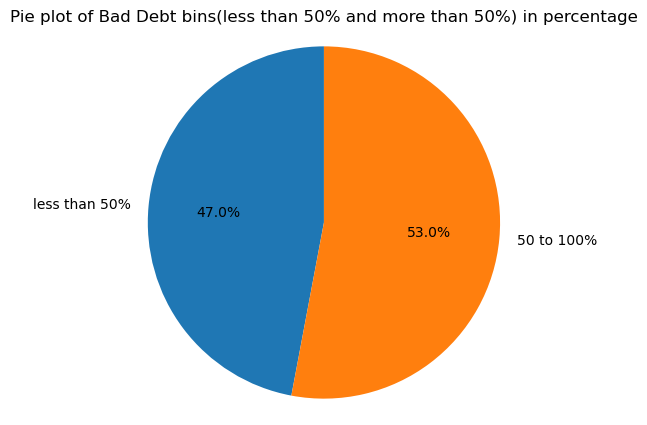

In [25]:
plt.figure(figsize=(5,5))
train_ds.groupby(['bins']).size().plot(kind='pie', subplots=True, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Pie plot of Bad Debt bins(less than 50% and more than 50%) in percentage")
plt.show()

#### •	Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

In [26]:
train_ds['city']

UID
267822       Hamilton
246444     South Bend
245683       Danville
279653       San Juan
247218      Manhattan
             ...     
279212          Coamo
277856      Blue Bell
233000        Weldona
287425    Colleyville
265371      Las Vegas
Name: city, Length: 27321, dtype: object

no city name given for the question so we can pick any city

In [27]:
ds_box_hamilton = train_ds.loc[train_ds['city']=='Hamilton']
ds_box_Manhattan = train_ds.loc[train_ds['city']=='Manhattan']
ds_box_San_juan = train_ds.loc[train_ds['city']=='San Juan']
ds_box_Danville = train_ds.loc[train_ds['city']=='Danville']
ds_box_Las_Vegas = train_ds.loc[train_ds['city']=='Las Vegas']
ds_box_city = pd.concat([ds_box_hamilton, ds_box_Manhattan,  ds_box_San_juan, ds_box_Danville, ds_box_Las_Vegas])

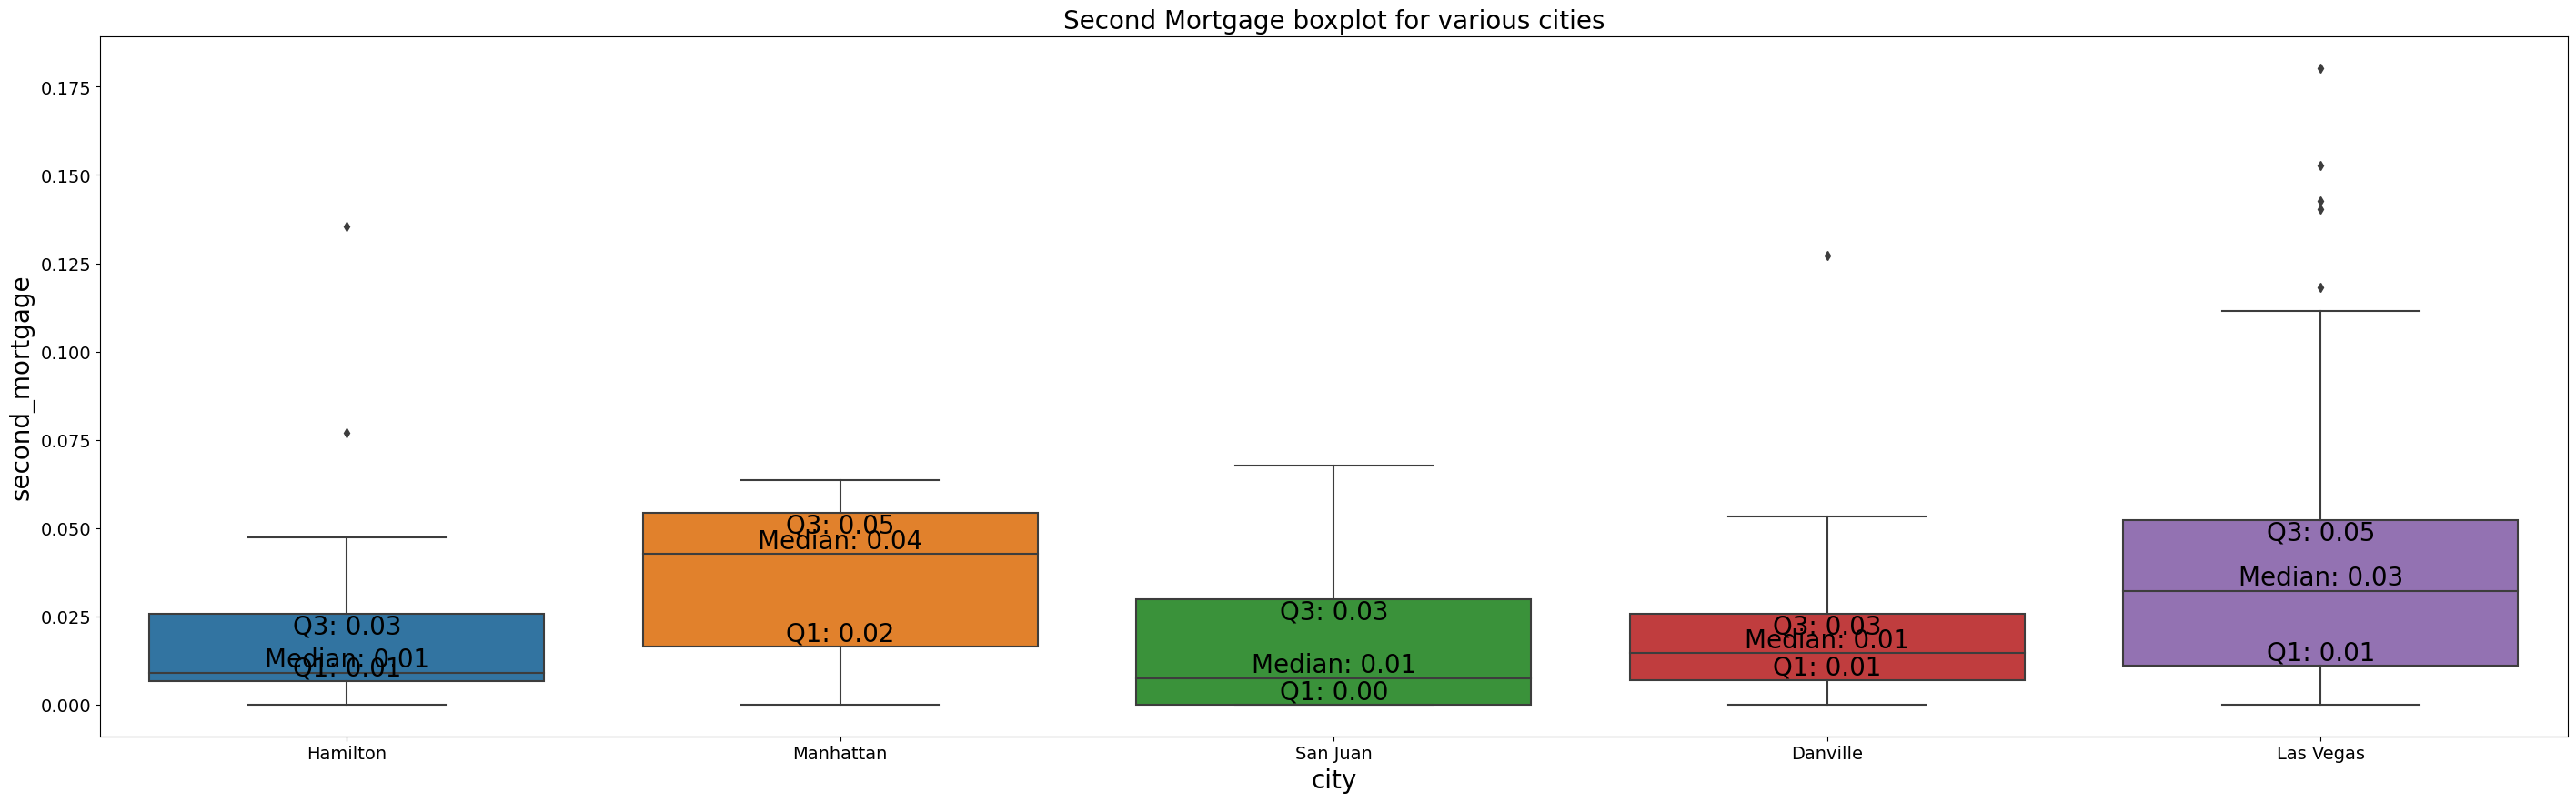

In [28]:
medians = ds_box_city.groupby('city')['second_mortgage'].median()
Q1 = ds_box_city.groupby('city')['second_mortgage'].quantile(0.25)
Q3 = ds_box_city.groupby('city')['second_mortgage'].quantile(0.75)

plt.figure(figsize=(35,10))
sns.boxplot(data = ds_box_city, x='city', y='second_mortgage')

# Add quartile and median details to the plot
for i, cities in enumerate(ds_box_city['city'].unique()):
    plt.text(i, Q1[cities], f"Q1: {Q1[cities]:.2f}",ha='center', va='bottom', fontsize = 20)
    plt.text(i, Q3[cities], f"Q3: {Q3[cities]:.2f}", ha='center', va='top', fontsize = 20)
    plt.text(i, medians[cities], f"Median: {medians[cities]:.2f}", ha='center', va='bottom', fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('city', fontsize=20)
plt.ylabel('second_mortgage', fontsize=20)
plt.title("Second Mortgage boxplot for various cities", fontsize=20)
plt.show()

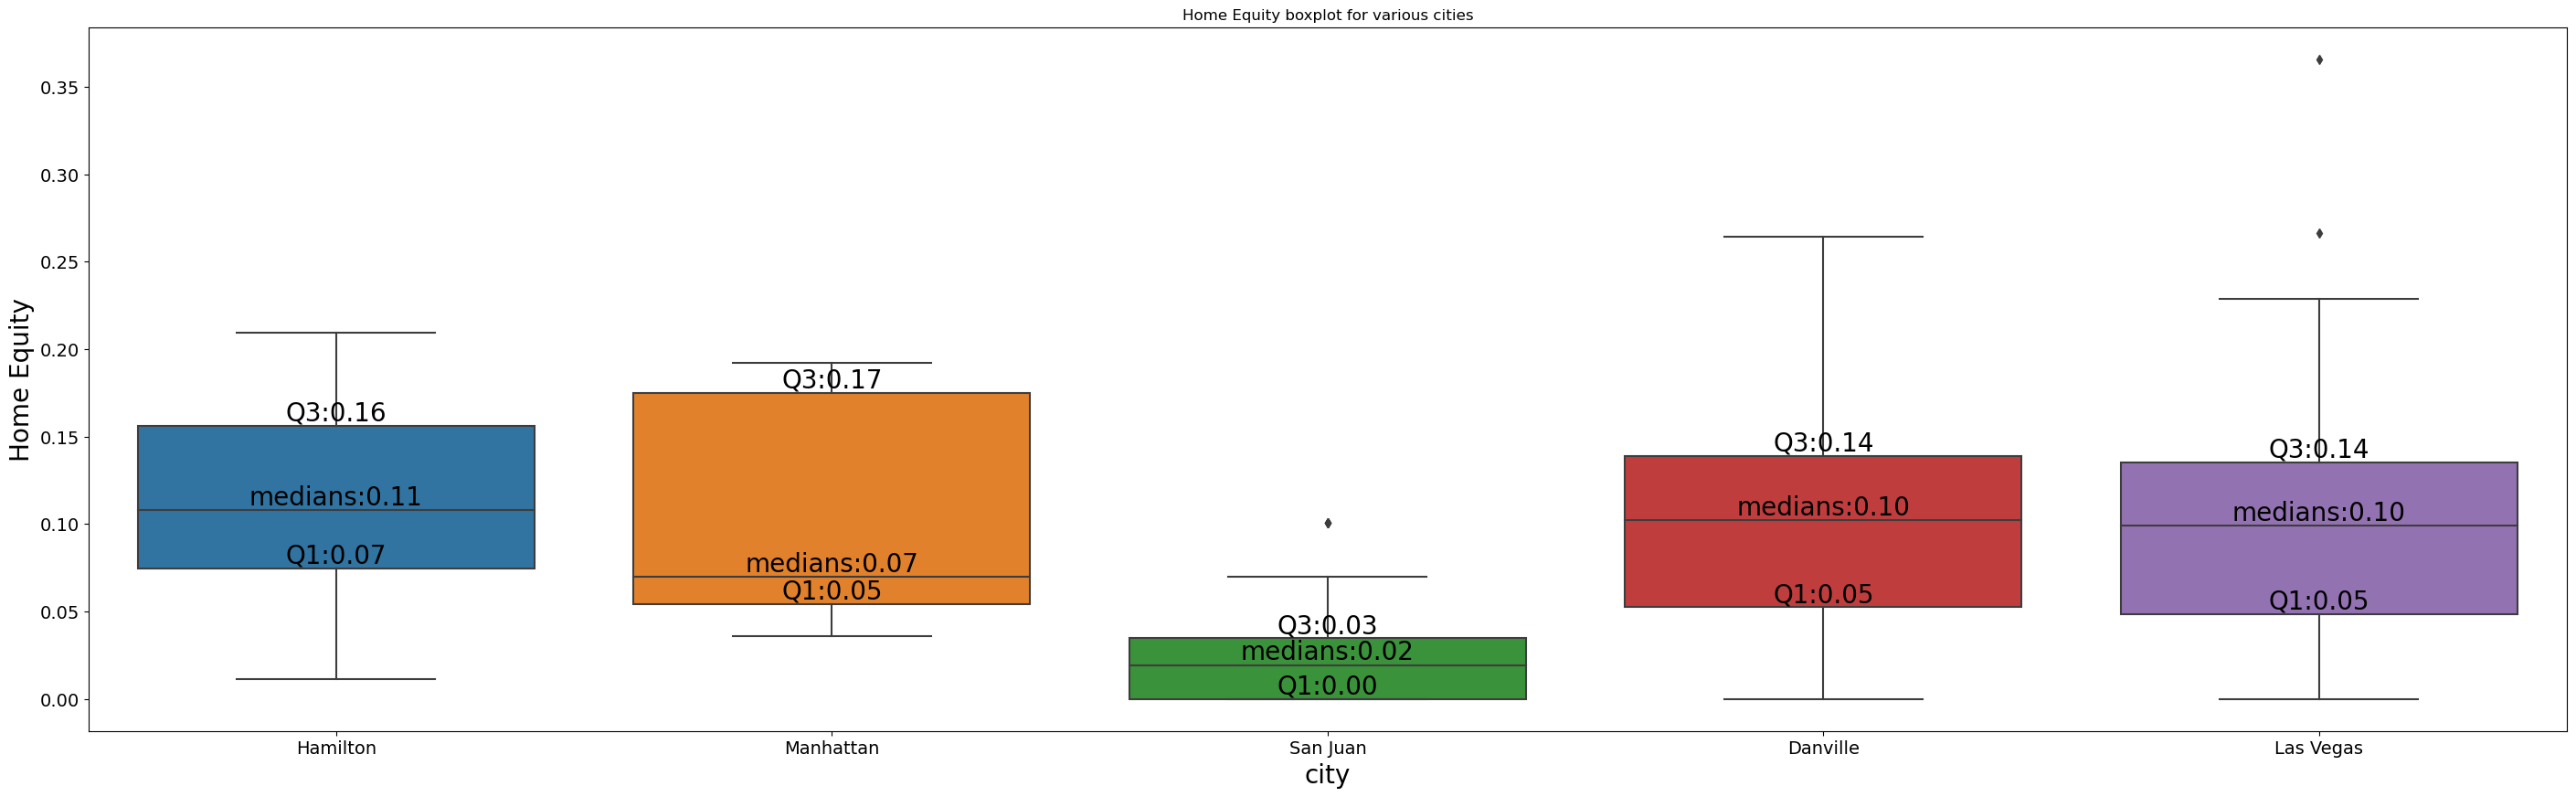

In [29]:
medians = ds_box_city.groupby('city')['home_equity'].median()
Q1 = ds_box_city.groupby('city')['home_equity'].quantile(0.25)
Q3 = ds_box_city.groupby('city')['home_equity'].quantile(0.75)
plt.figure(figsize=(35,10))
sns.boxplot(data = ds_box_city, x='city', y='home_equity')
#quatile and median text addition to plot
for i, cities in enumerate(ds_box_city['city'].unique()):
    plt.text(i,Q1[cities],f"Q1:{Q1[cities]:.2f}",ha='center', va='bottom', fontsize=20)
    plt.text(i,medians[cities], f"medians:{medians[cities]:.2f}",ha='center', va='bottom', fontsize=20)
    plt.text(i,Q3[cities],f"Q3:{Q3[cities]:.2f}",ha='center', va='bottom',fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('city', fontsize=20)
plt.ylabel('Home Equity', fontsize=20)
plt.title("Home Equity boxplot for various cities")
plt.show()

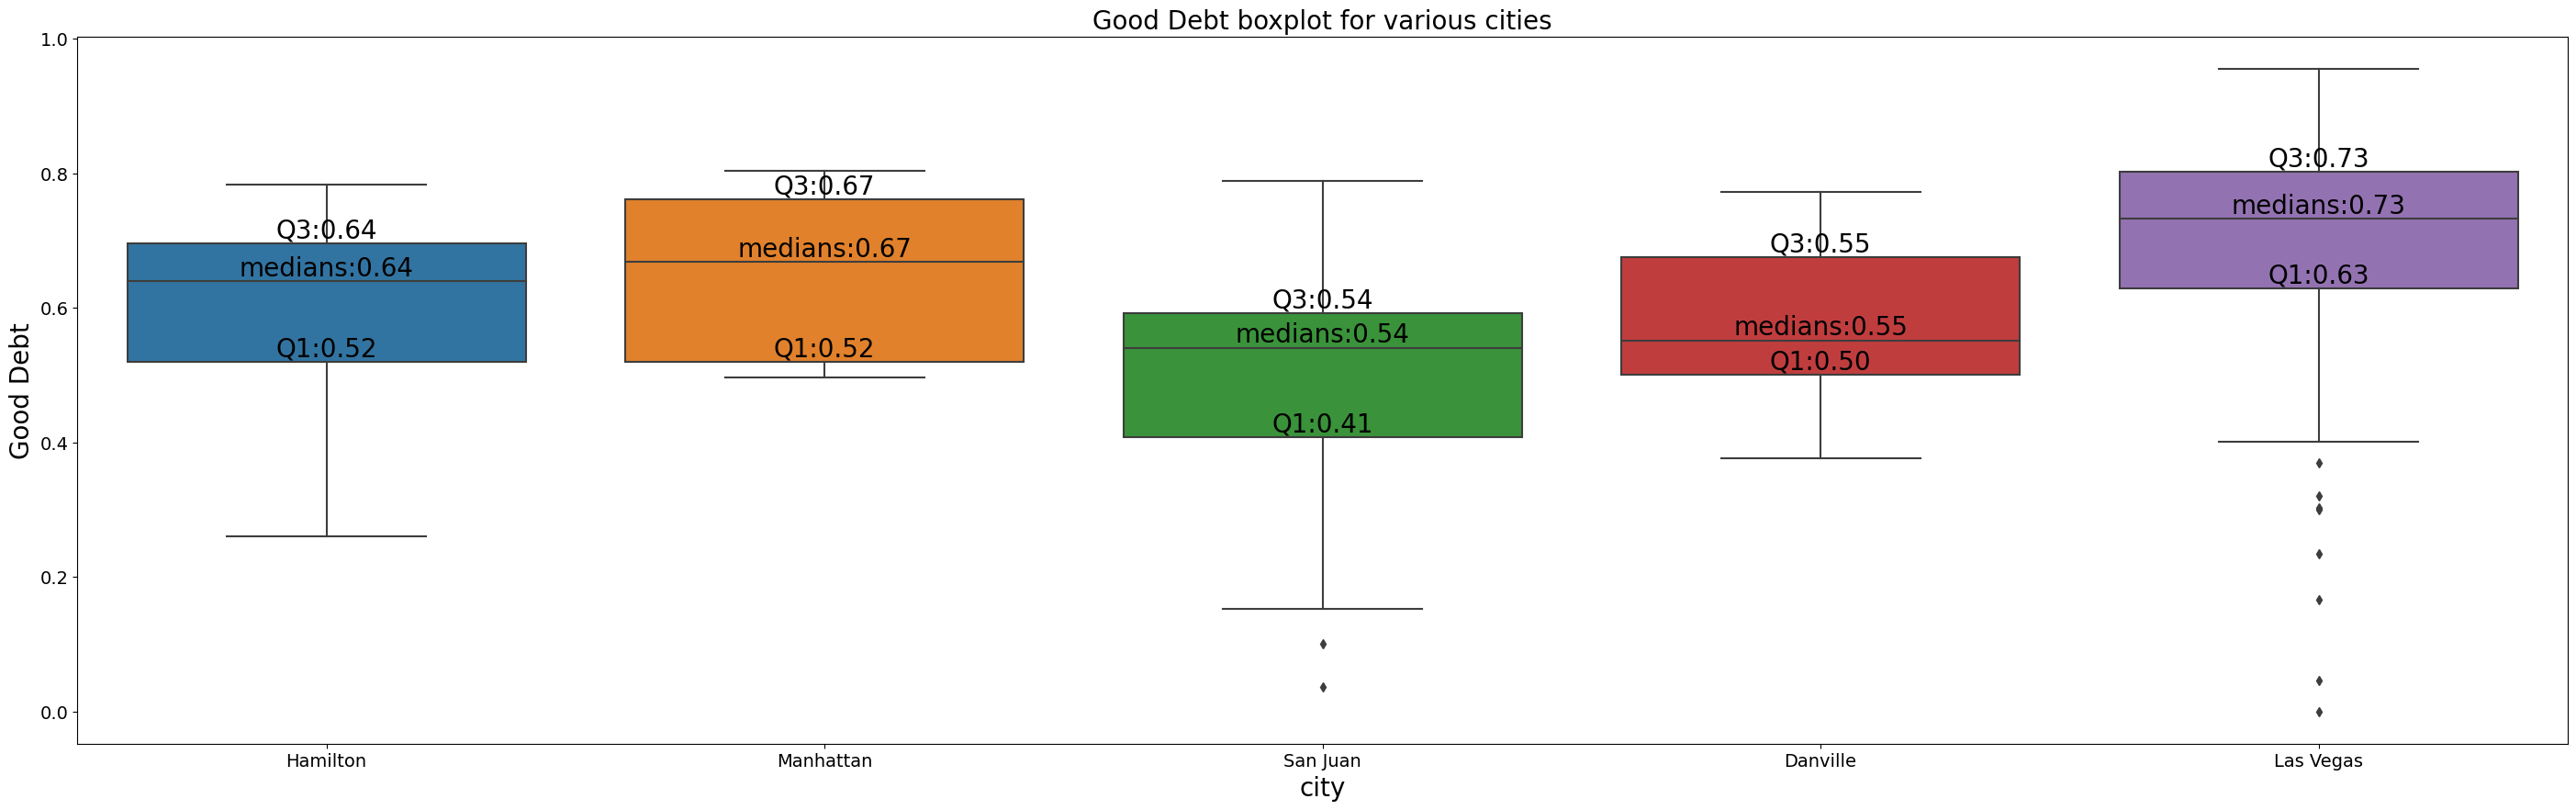

In [30]:
Q1= ds_box_city.groupby('city')['debt'].quantile(0.25)
Q3 = ds_box_city.groupby('city')['debt'].quantile(0.75)
medians = ds_box_city.groupby('city')['debt'].median()
plt.figure(figsize=(35,10))
sns.boxplot(data = ds_box_city, x='city', y='debt')
for i, cities in enumerate(ds_box_city['city'].unique()):
    plt.text(i, Q1[cities],f"Q1:{Q1[cities]:.2f}",ha='center', va='bottom', fontsize=20)
    plt.text(i,medians[cities], f"medians:{medians[cities]:.2f}",ha='center', va='bottom',fontsize=20)
    plt.text(i,Q3[cities], f"Q3:{medians[cities]:.2f}", ha='center', va='bottom',fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('city', fontsize=20)
plt.ylabel('Good Debt', fontsize=20)
plt.title("Good Debt boxplot for various cities", fontsize=20)
plt.show()

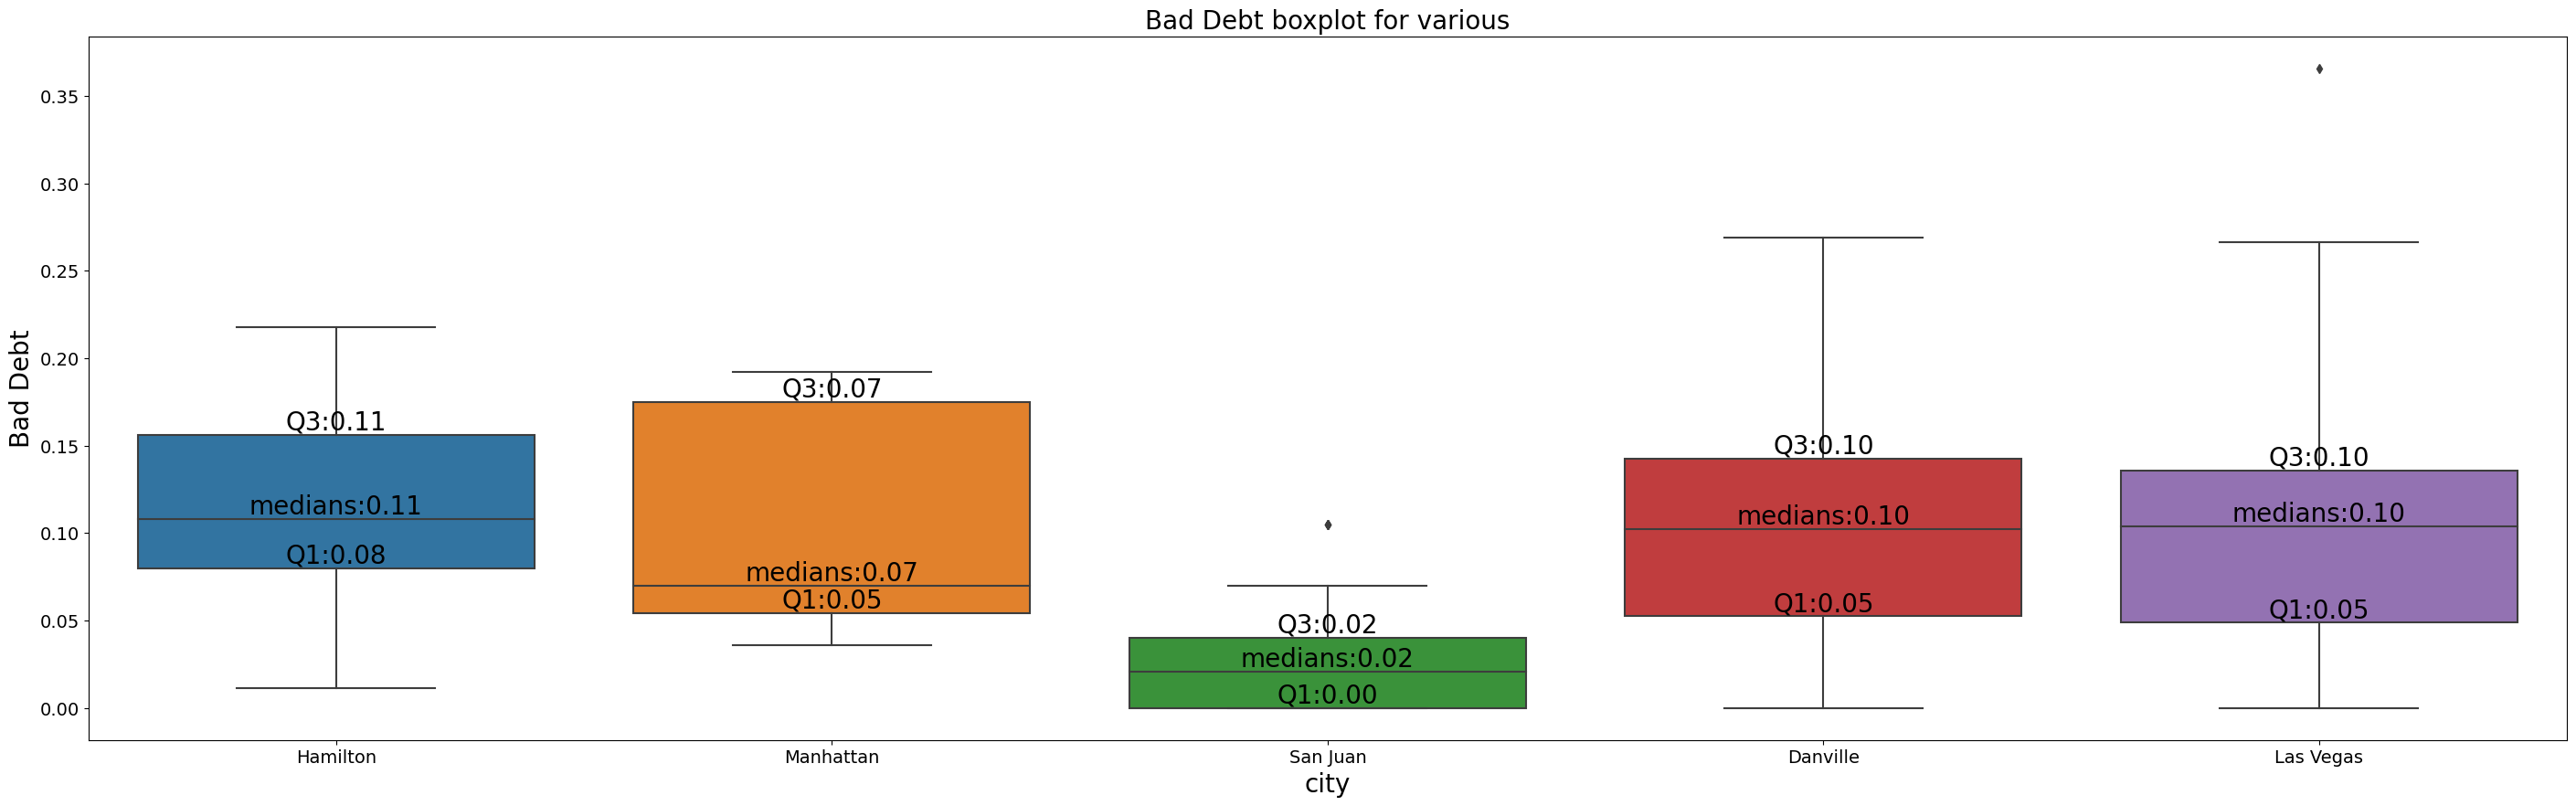

In [31]:
Q1=ds_box_city.groupby('city')['bad_debit'].quantile(0.25)
Q3 = ds_box_city.groupby('city')['bad_debit'].quantile(0.75)
medians = ds_box_city.groupby('city')['bad_debit'].median()
plt.figure(figsize=(35,10))
sns.boxplot(data = ds_box_city, x='city', y='bad_debit')
for i, j in enumerate(ds_box_city['city'].unique()):
    plt.text(i, Q1[j],f"Q1:{Q1[j]:.2f}",ha='center', va='bottom', fontsize=20)
    plt.text(i,medians[j], f"medians:{medians[j]:.2f}",ha='center', va='bottom',fontsize=20)
    plt.text(i,Q3[j], f"Q3:{medians[j]:.2f}", ha='center', va='bottom',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("city", fontsize=20)
plt.ylabel('Bad Debt', fontsize=20)
plt.title("Bad Debt boxplot for various", fontsize=20)
plt.show()

#### •	Create a collated income distribution chart for family income, house hold income, and remaining income

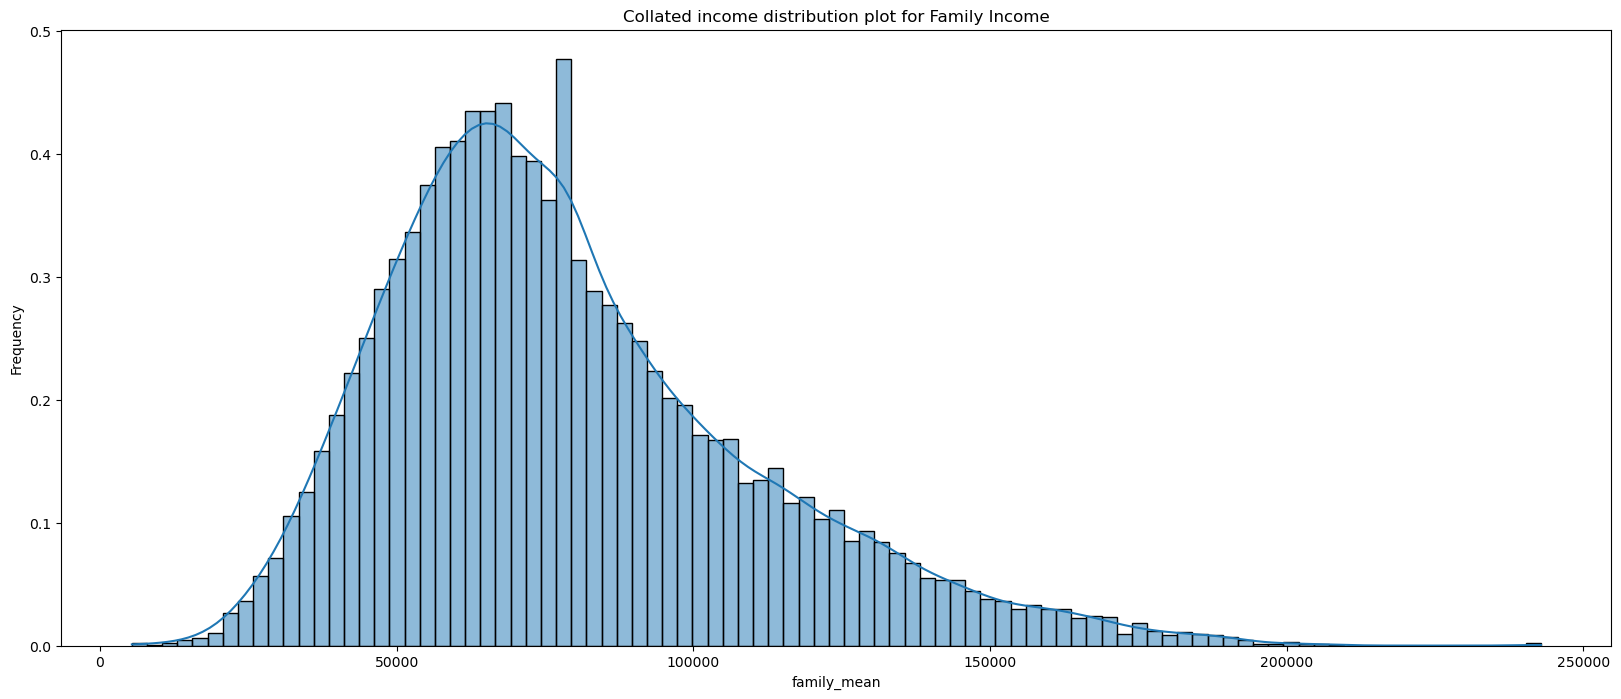

In [32]:
plt.figure(figsize=(20,8))
sns.histplot(train_ds["family_mean"], kde=True, stat="frequency")
plt.title("Collated income distribution plot for Family Income")
plt.show()

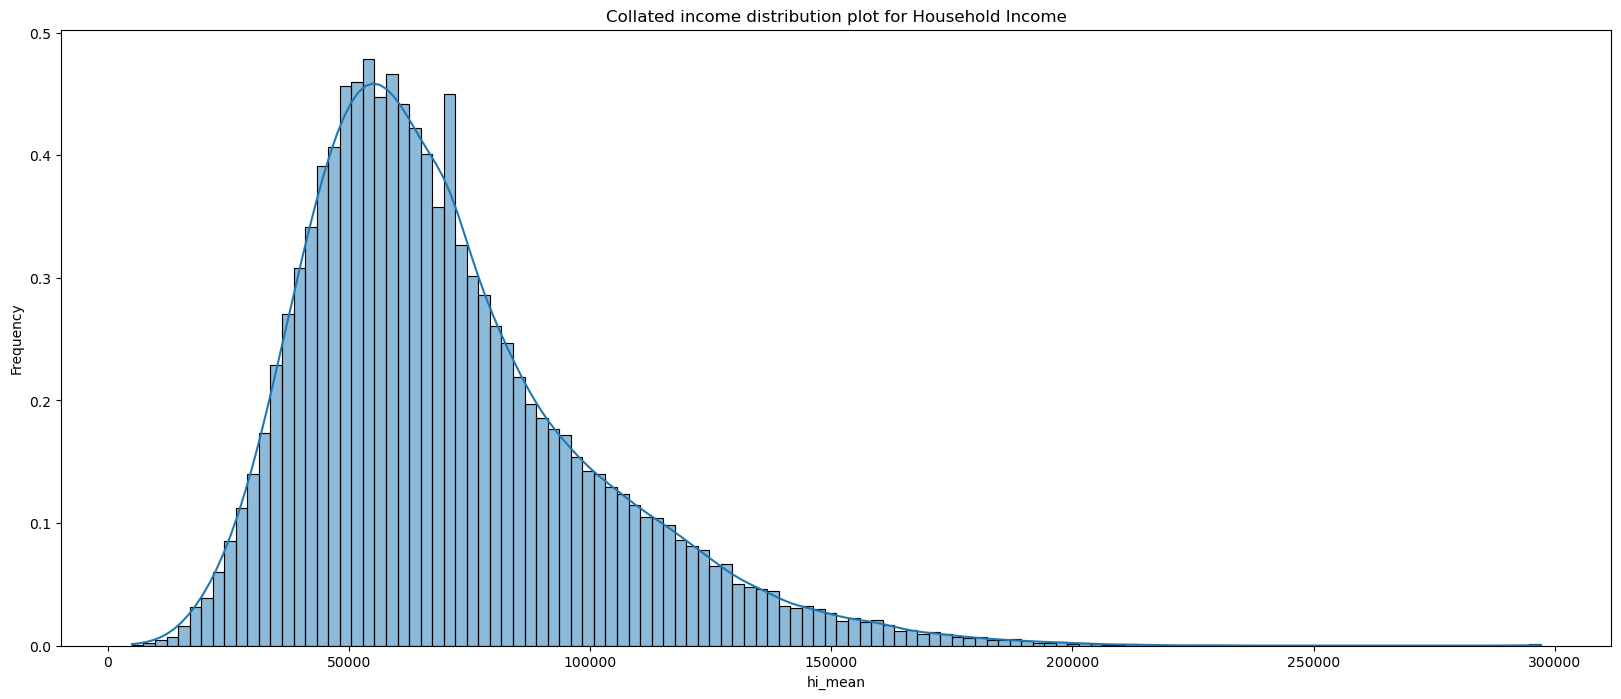

In [33]:
plt.figure(figsize=(20,8))
sns.histplot(train_ds["hi_mean"], kde=True, stat="frequency")
plt.title("Collated income distribution plot for Household Income")
plt.show()

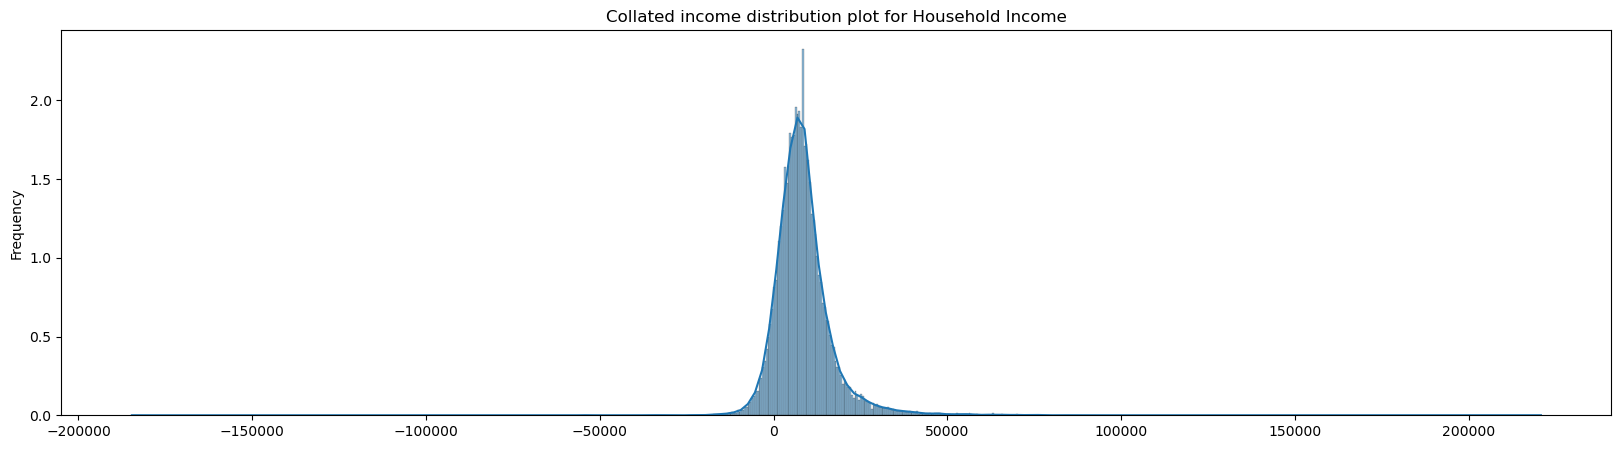

In [34]:
plt.figure(figsize=(20,5))
sns.histplot(train_ds["family_mean"]-train_ds["hi_mean"], kde=True, stat="frequency")
plt.title("Collated income distribution plot for Household Income")
plt.show()

### Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements): 

#### •	Use pop and ALand variables to create a new field called population density

In [35]:
train_ds["Population_density"]= train_ds["pop"]/train_ds["ALand"]
test_ds["Population_density"] = test_ds["pop"]/test_ds["ALand"]
train_ds.head()

,COUNTYID,STATEID,state,state_ab,city,place,type,zip_code,area_code,lat,...,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,bad_debit,bins,Population_density
UID,,,,,,,,,,,,,,,,,,,,,
267822,53,36,New York,NY,Hamilton,Hamilton,City,13346,315,42.840812,...,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,0.09408,less than 50%,0.000026
246444,141,18,Indiana,IN,South Bend,Roseland,City,46616,574,41.701441,...,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,0.04274,less than 50%,0.001687
245683,63,18,Indiana,IN,Danville,Danville,City,46122,317,39.792202,...,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,0.09512,less than 50%,0.000099
279653,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,927,787,18.396103,...,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,0.01086,less than 50%,0.002442
247218,161,20,Kansas,KS,Manhattan,Manhattan City,City,66502,785,39.195573,...,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109,0.05426,less than 50%,0.002207


C:\Users\selpa\AppData\Local\Temp\ipykernel_18776\4287787277.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_ds["Population_density"])


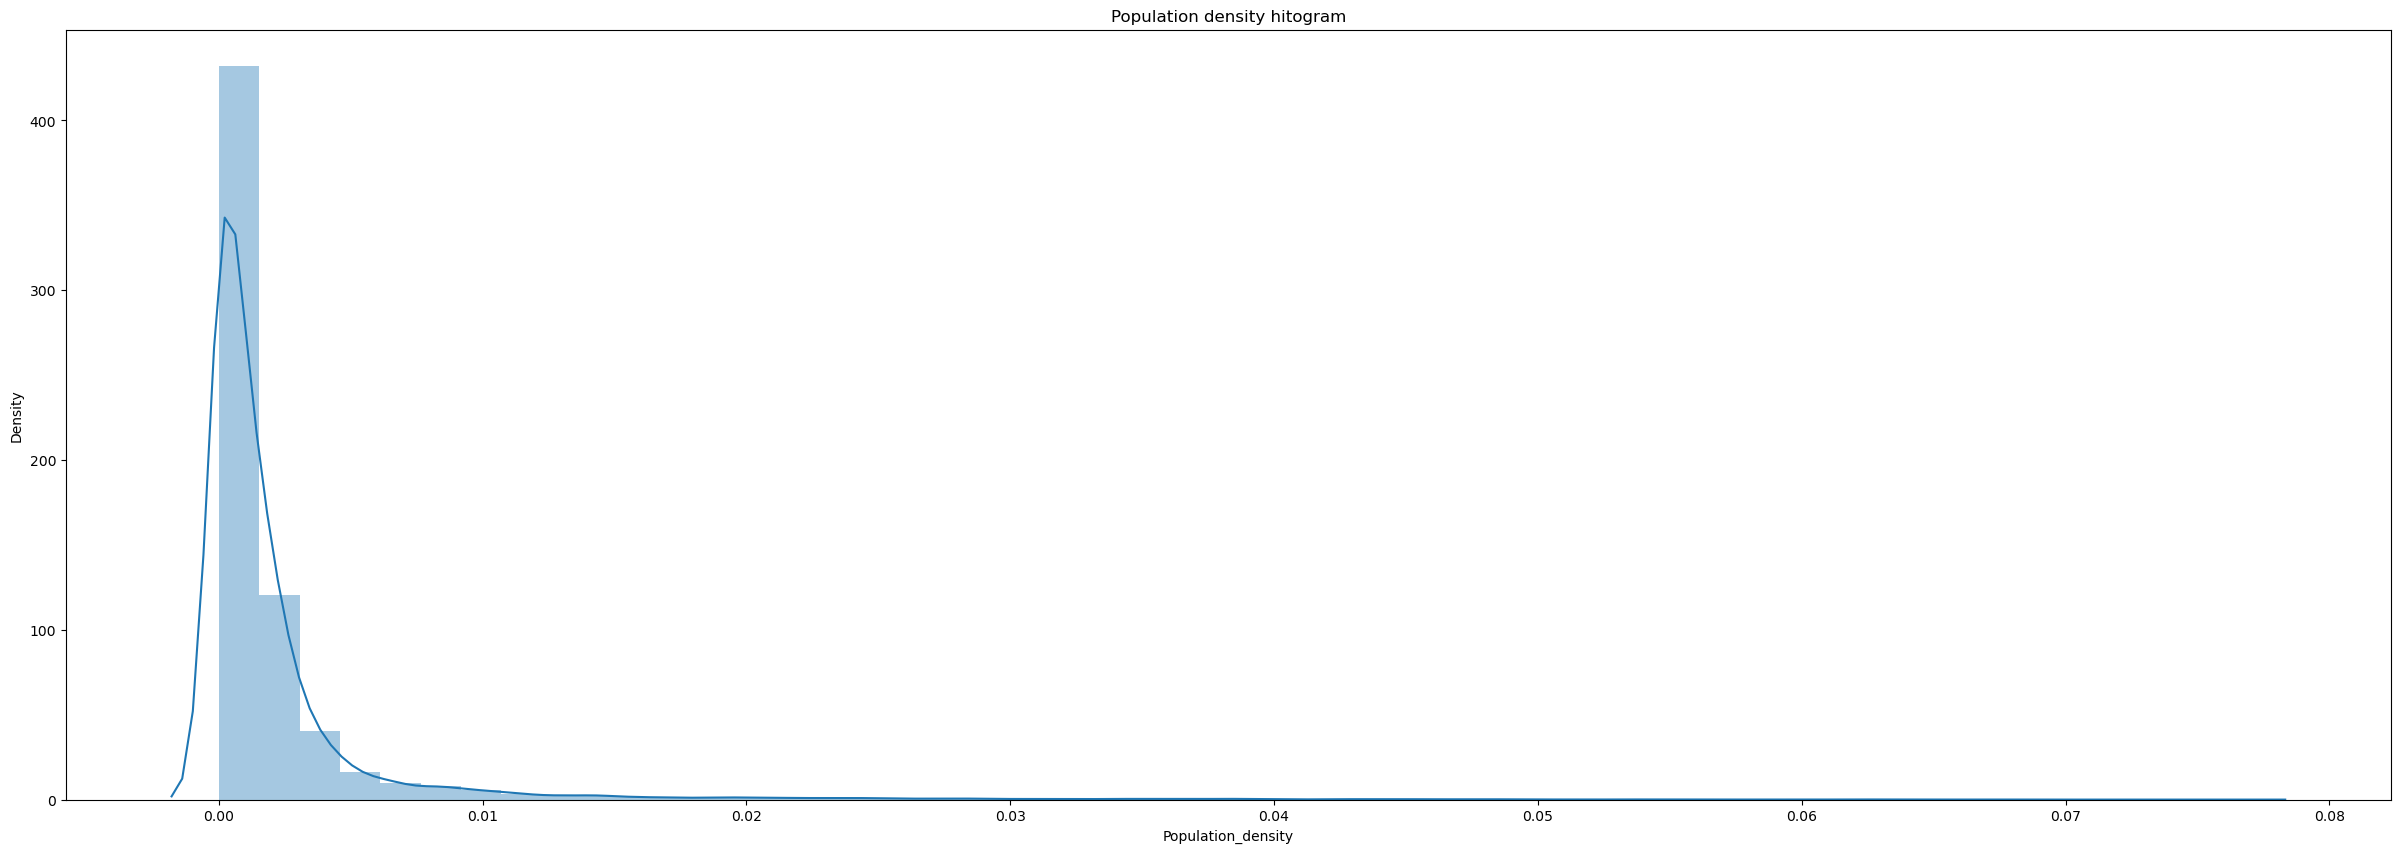

In [36]:
plt.figure(figsize=(30,10))
sns.distplot(train_ds["Population_density"])
plt.title("Population density hitogram")
plt.show()

In [37]:
train_dense_pop = train_ds.nlargest(50, "Population_density")
train_lessdense_pop = test_ds.nsmallest(90, "Population_density")

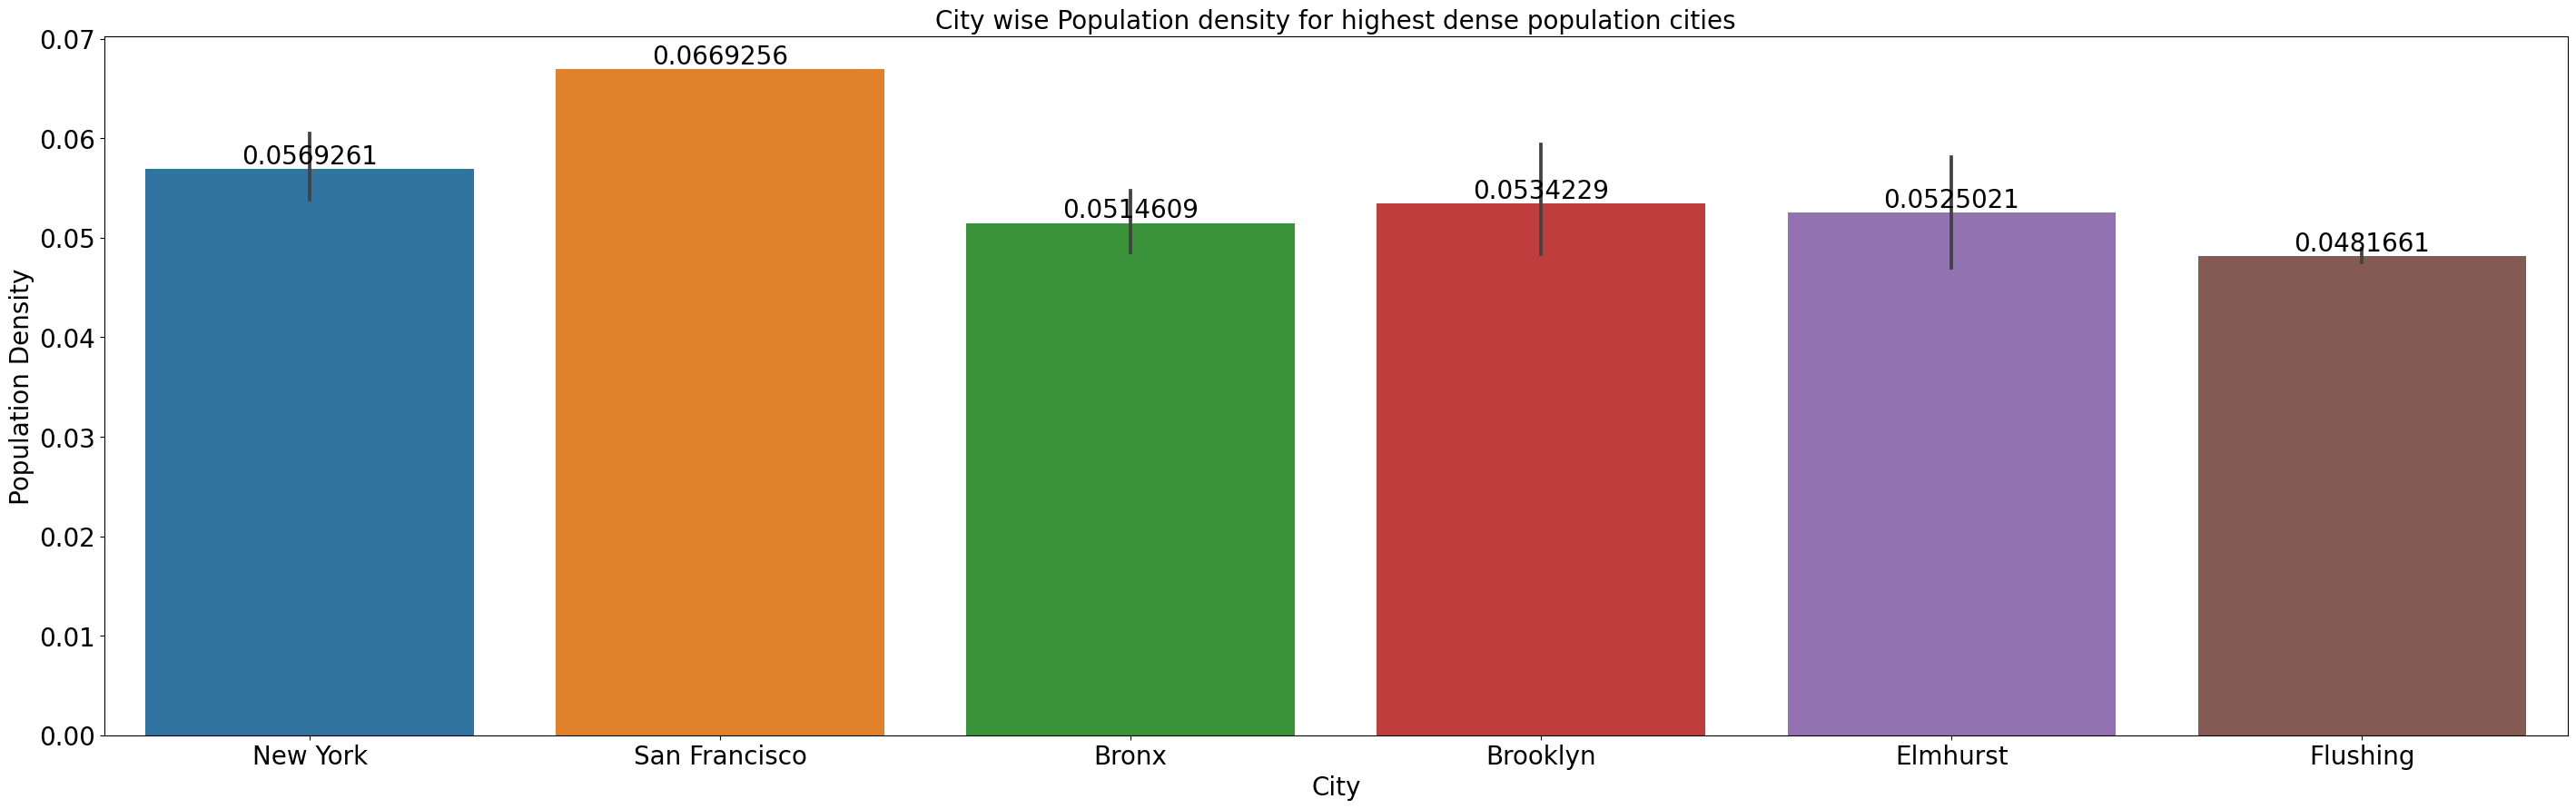

In [38]:
plt.figure(figsize=(35,10))
ax = sns.barplot(x="city", y = "Population_density", data=train_dense_pop)
for label in ax.containers:
    ax.bar_label(label, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('City', fontsize=20)
plt.ylabel("Population Density", fontsize=20)
plt.title("City wise Population density for highest dense population cities", fontsize=20)
plt.show()

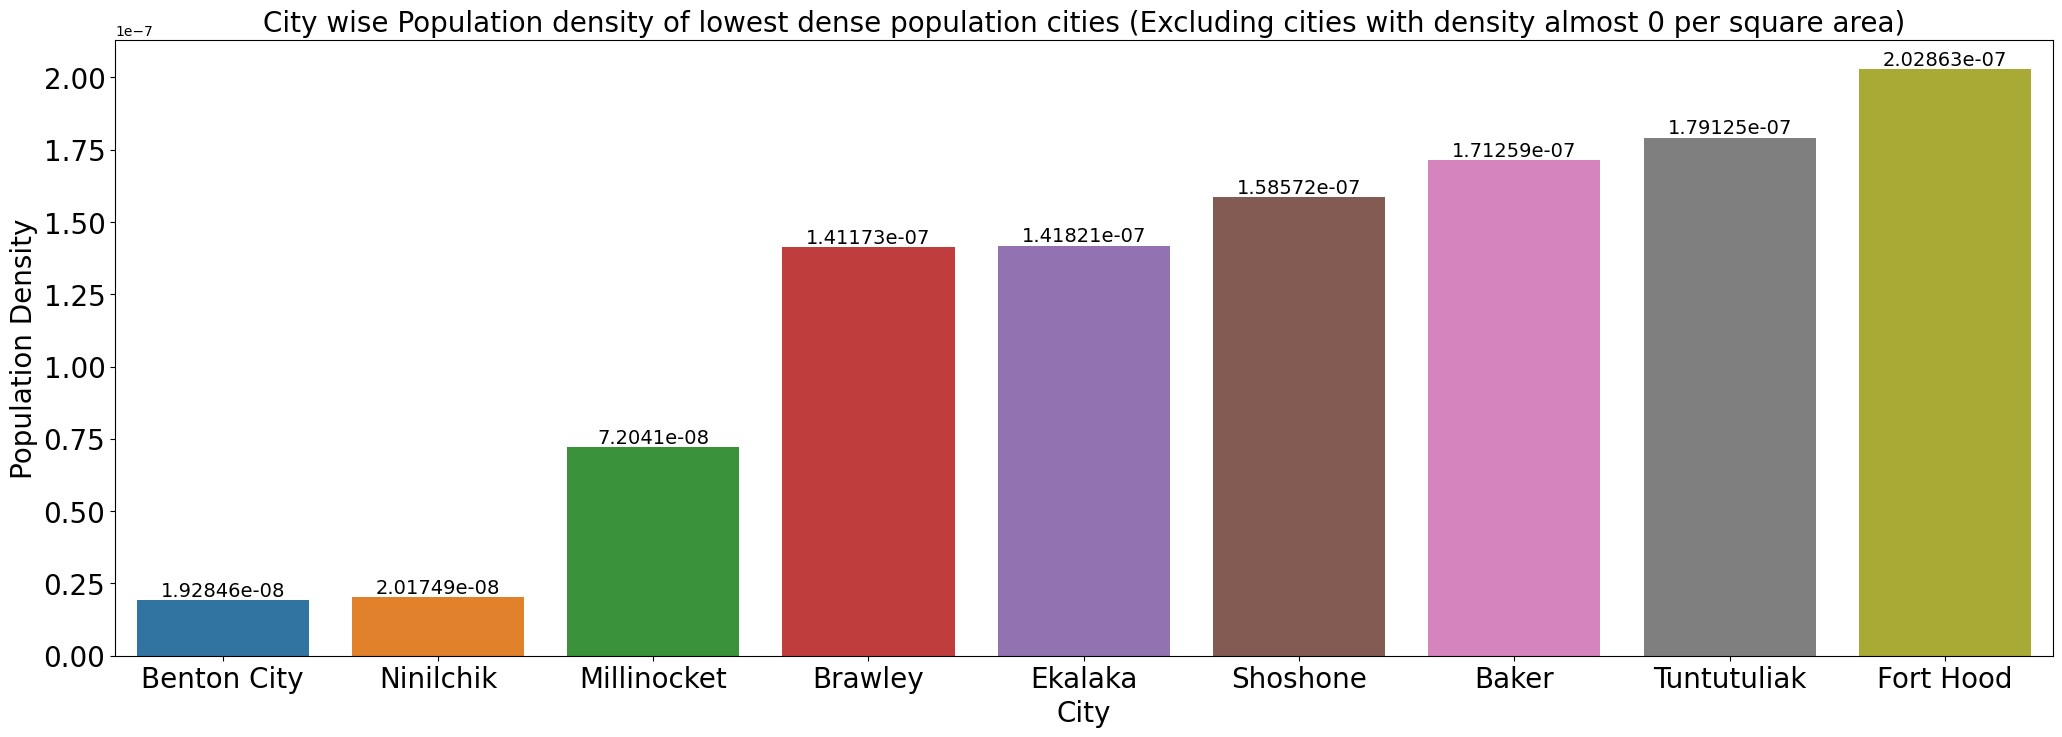

UID
247510            Kansas
240928            Hawaii
269319          New York
249283         Louisiana
260922    North Carolina
Name: state, dtype: object


In [39]:
plt.figure(figsize=(25,8))
ax = sns.barplot(x='city', y='Population_density', data=train_lessdense_pop[train_lessdense_pop['Population_density']>0])
for label in ax.containers:
    ax.bar_label(label, fontsize=14)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('City', fontsize=20)
plt.ylabel("Population Density", fontsize=20)
plt.title("City wise Population density of lowest dense population cities (Excluding cities with density almost 0 per square area)", fontsize=20)
plt.show()
print(train_lessdense_pop[train_lessdense_pop['Population_density']==0].state.head())

#### •	Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age

In [40]:
train_ds["median_age"] = (train_ds["male_pop"]*train_ds["male_age_median"] + train_ds["female_pop"]*train_ds["female_age_median"] )/train_ds["pop"]
test_ds["median_age"] = (test_ds["male_pop"]*test_ds["male_age_median"] + test_ds["female_pop"]*test_ds["female_pop"])/test_ds["pop"]

In [41]:
max_age_data = train_ds.nlargest(10, 'median_age')
min_age_data = train_ds.nsmallest(10, 'median_age')

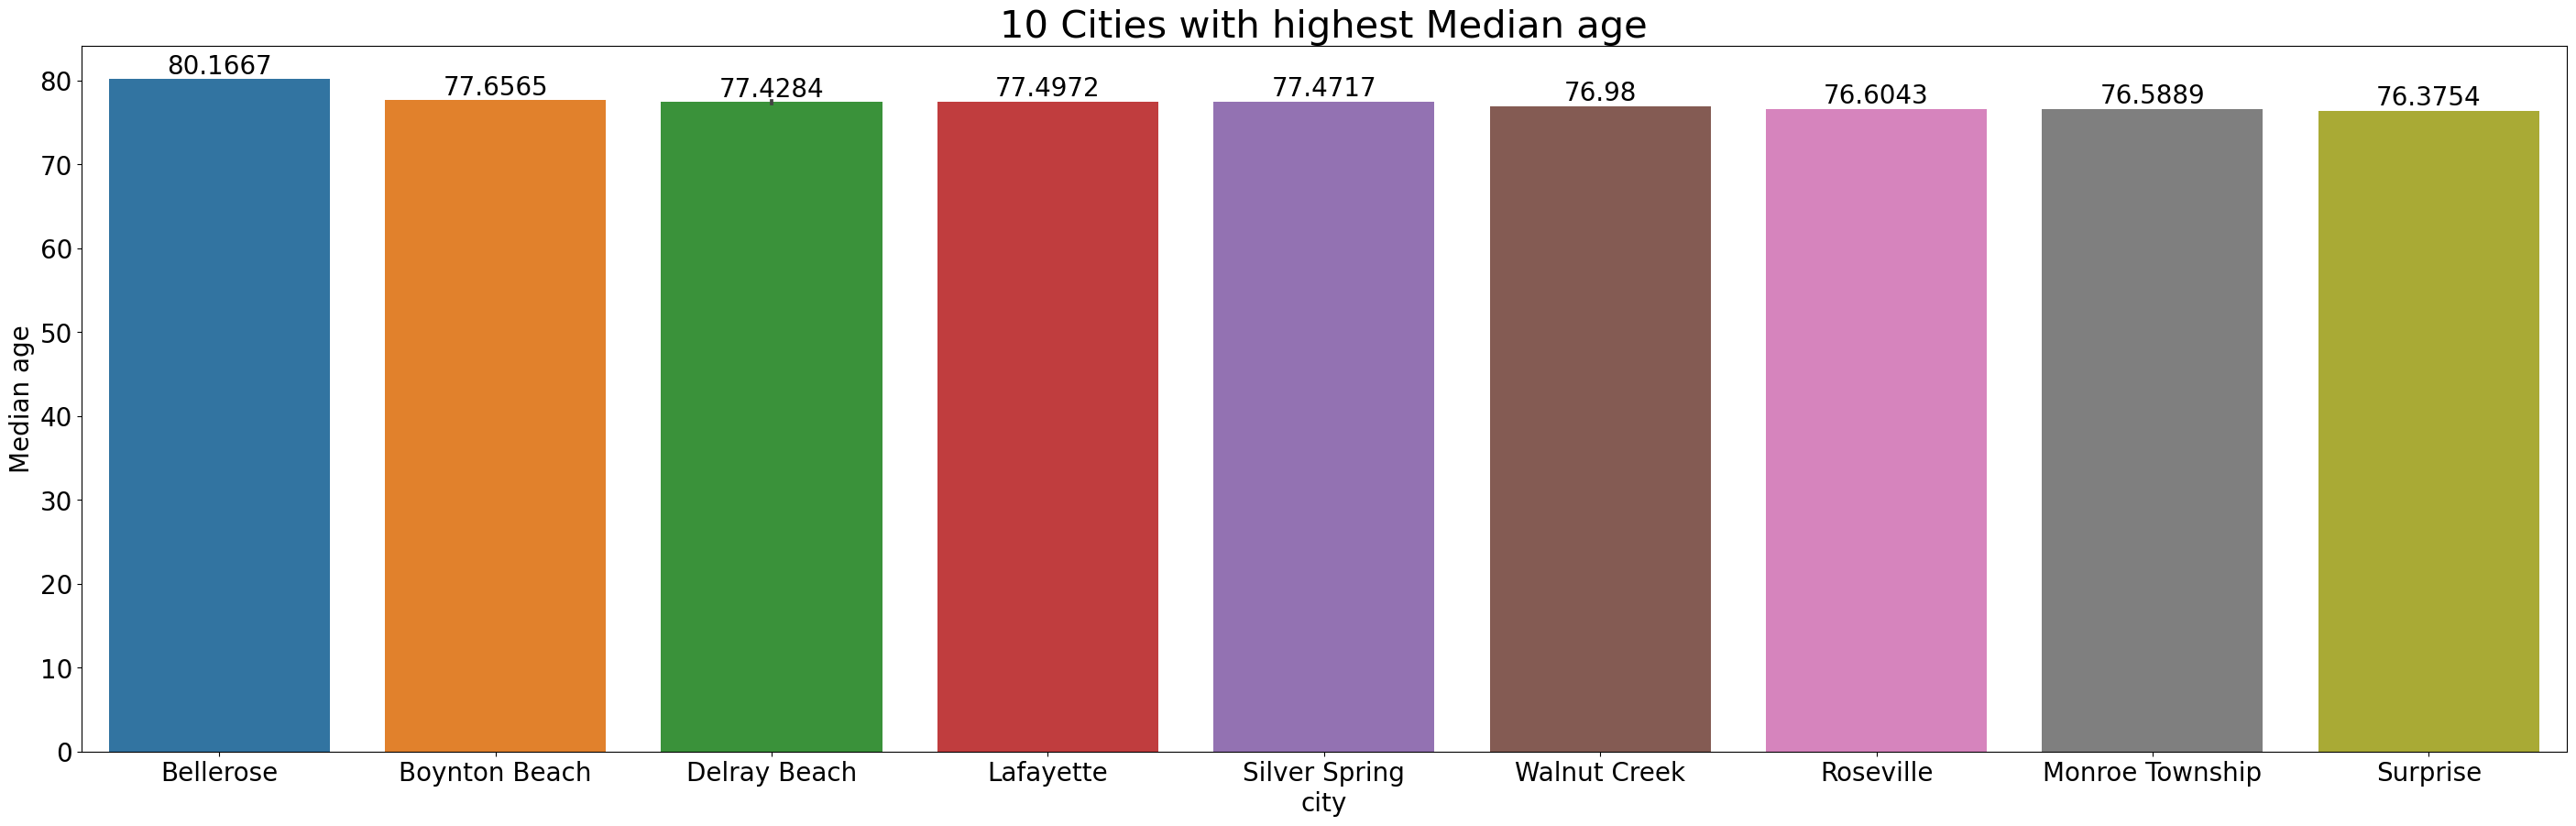

In [42]:
plt.figure(figsize = (35, 10))
ax = sns.barplot(x='city',y='median_age', data=max_age_data)
plt.title("10 Cities with highest Median age", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('city', fontsize=20)
plt.ylabel('Median age', fontsize=20)
for label in ax.containers:
    ax.bar_label(label, fontsize=20)
plt.show()

The cities with highest median age are :<br>
Bellerose<br>Boynton Beach<br>Felray Beach<br>Lafayette<br>Silver Spring city<br>Walnut Creek<br>Roseville<br>Monroe Township<br>Surprise<br>


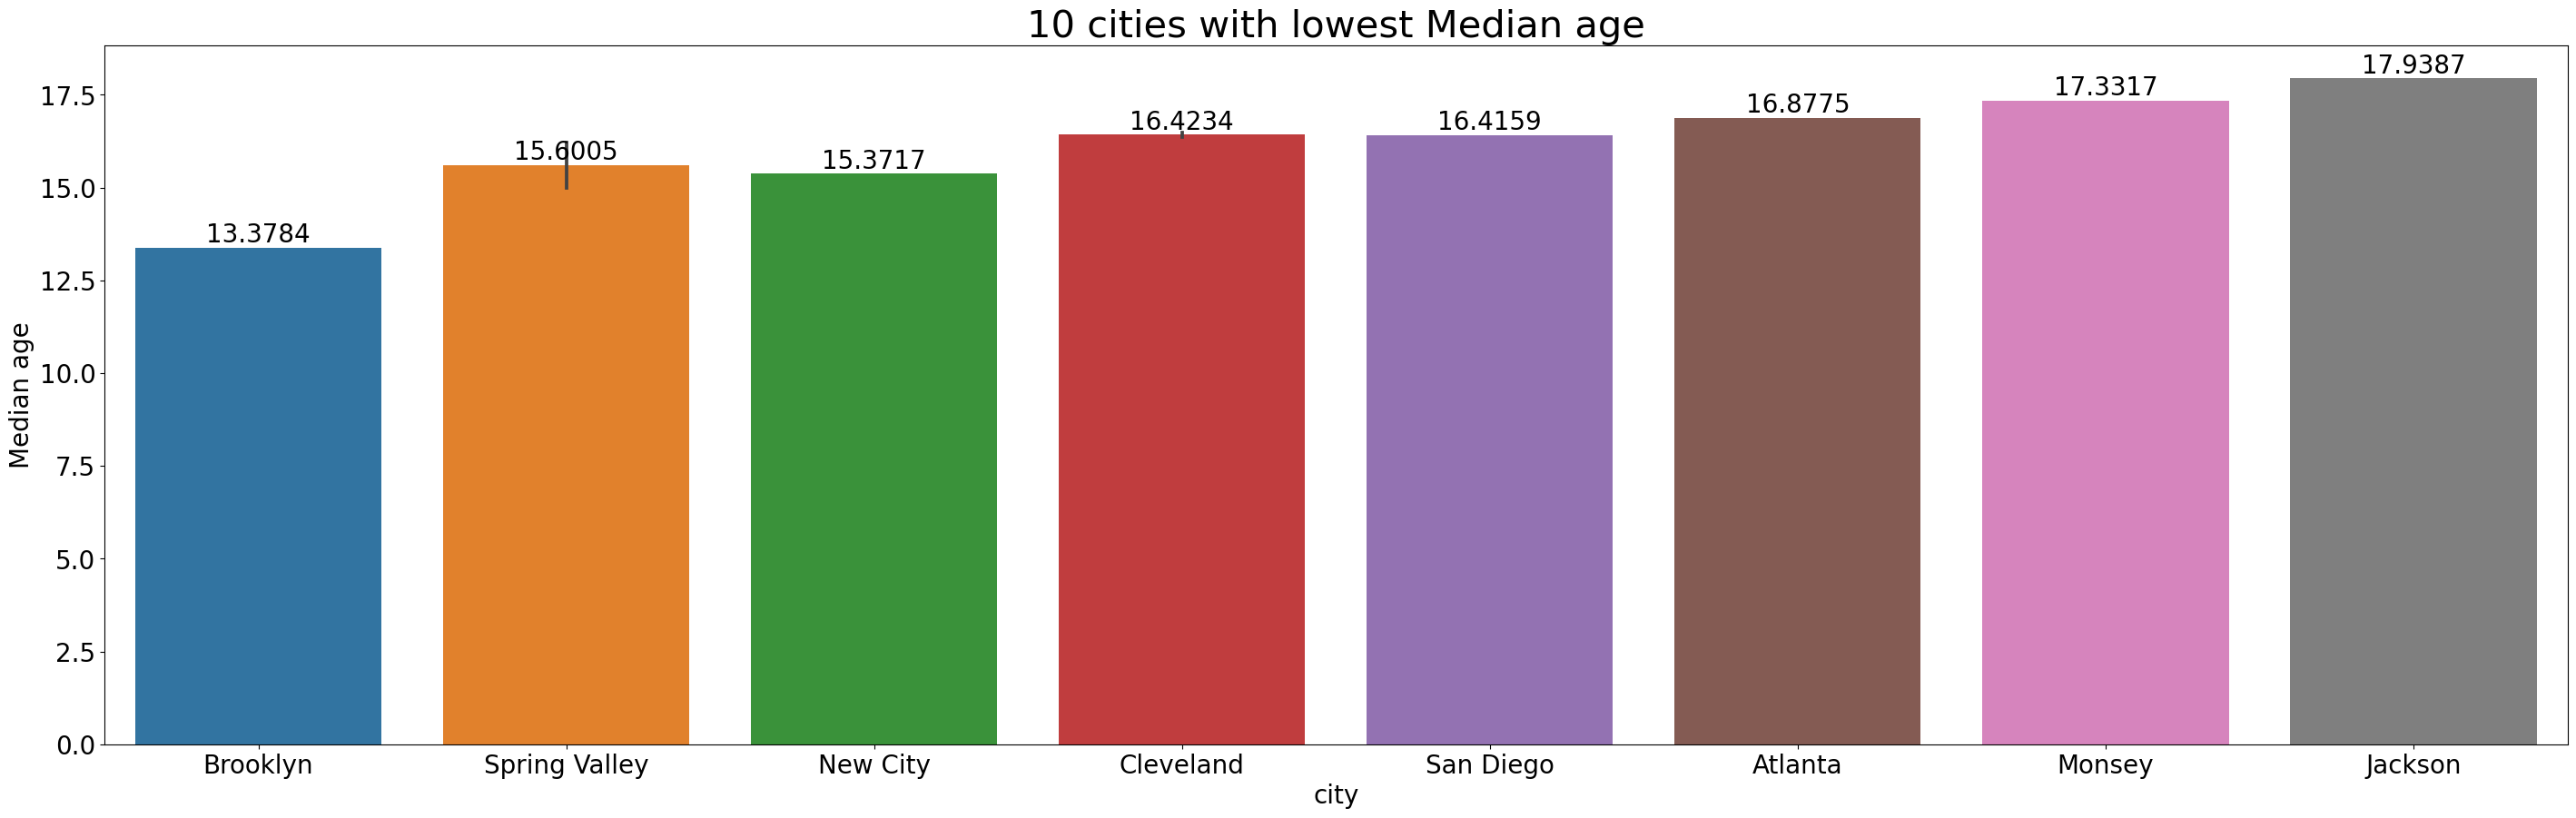

In [43]:
plt.figure(figsize = (35, 10))
ax = sns.barplot(min_age_data, x='city',y='median_age')
plt.title("10 cities with lowest Median age", fontsize=30)
plt.xlabel('city', fontsize=20)
plt.ylabel('Median age', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
for label in ax.containers:
    ax.bar_label(label, fontsize=20)
plt.show()

### 6.	Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

In [44]:
train_ds['pop_bin']=pd.cut(train_ds['pop'], bins=5, labels=['extremely low', 'low', 'moderate', 'high', 'very high'])

In [45]:
print(r"The number of unique category is:",train_ds.pop_bin.nunique())
print("\nThe unique categories are: ",train_ds.pop_bin.unique())

The number of unique category is: 5

The unique categories are:  ['extremely low', 'low', 'very high', 'high', 'moderate']
Categories (5, object): ['extremely low' < 'low' < 'moderate' < 'high' < 'very high']


#### •	Analyze the married, separated, and divorced population for these population brackets

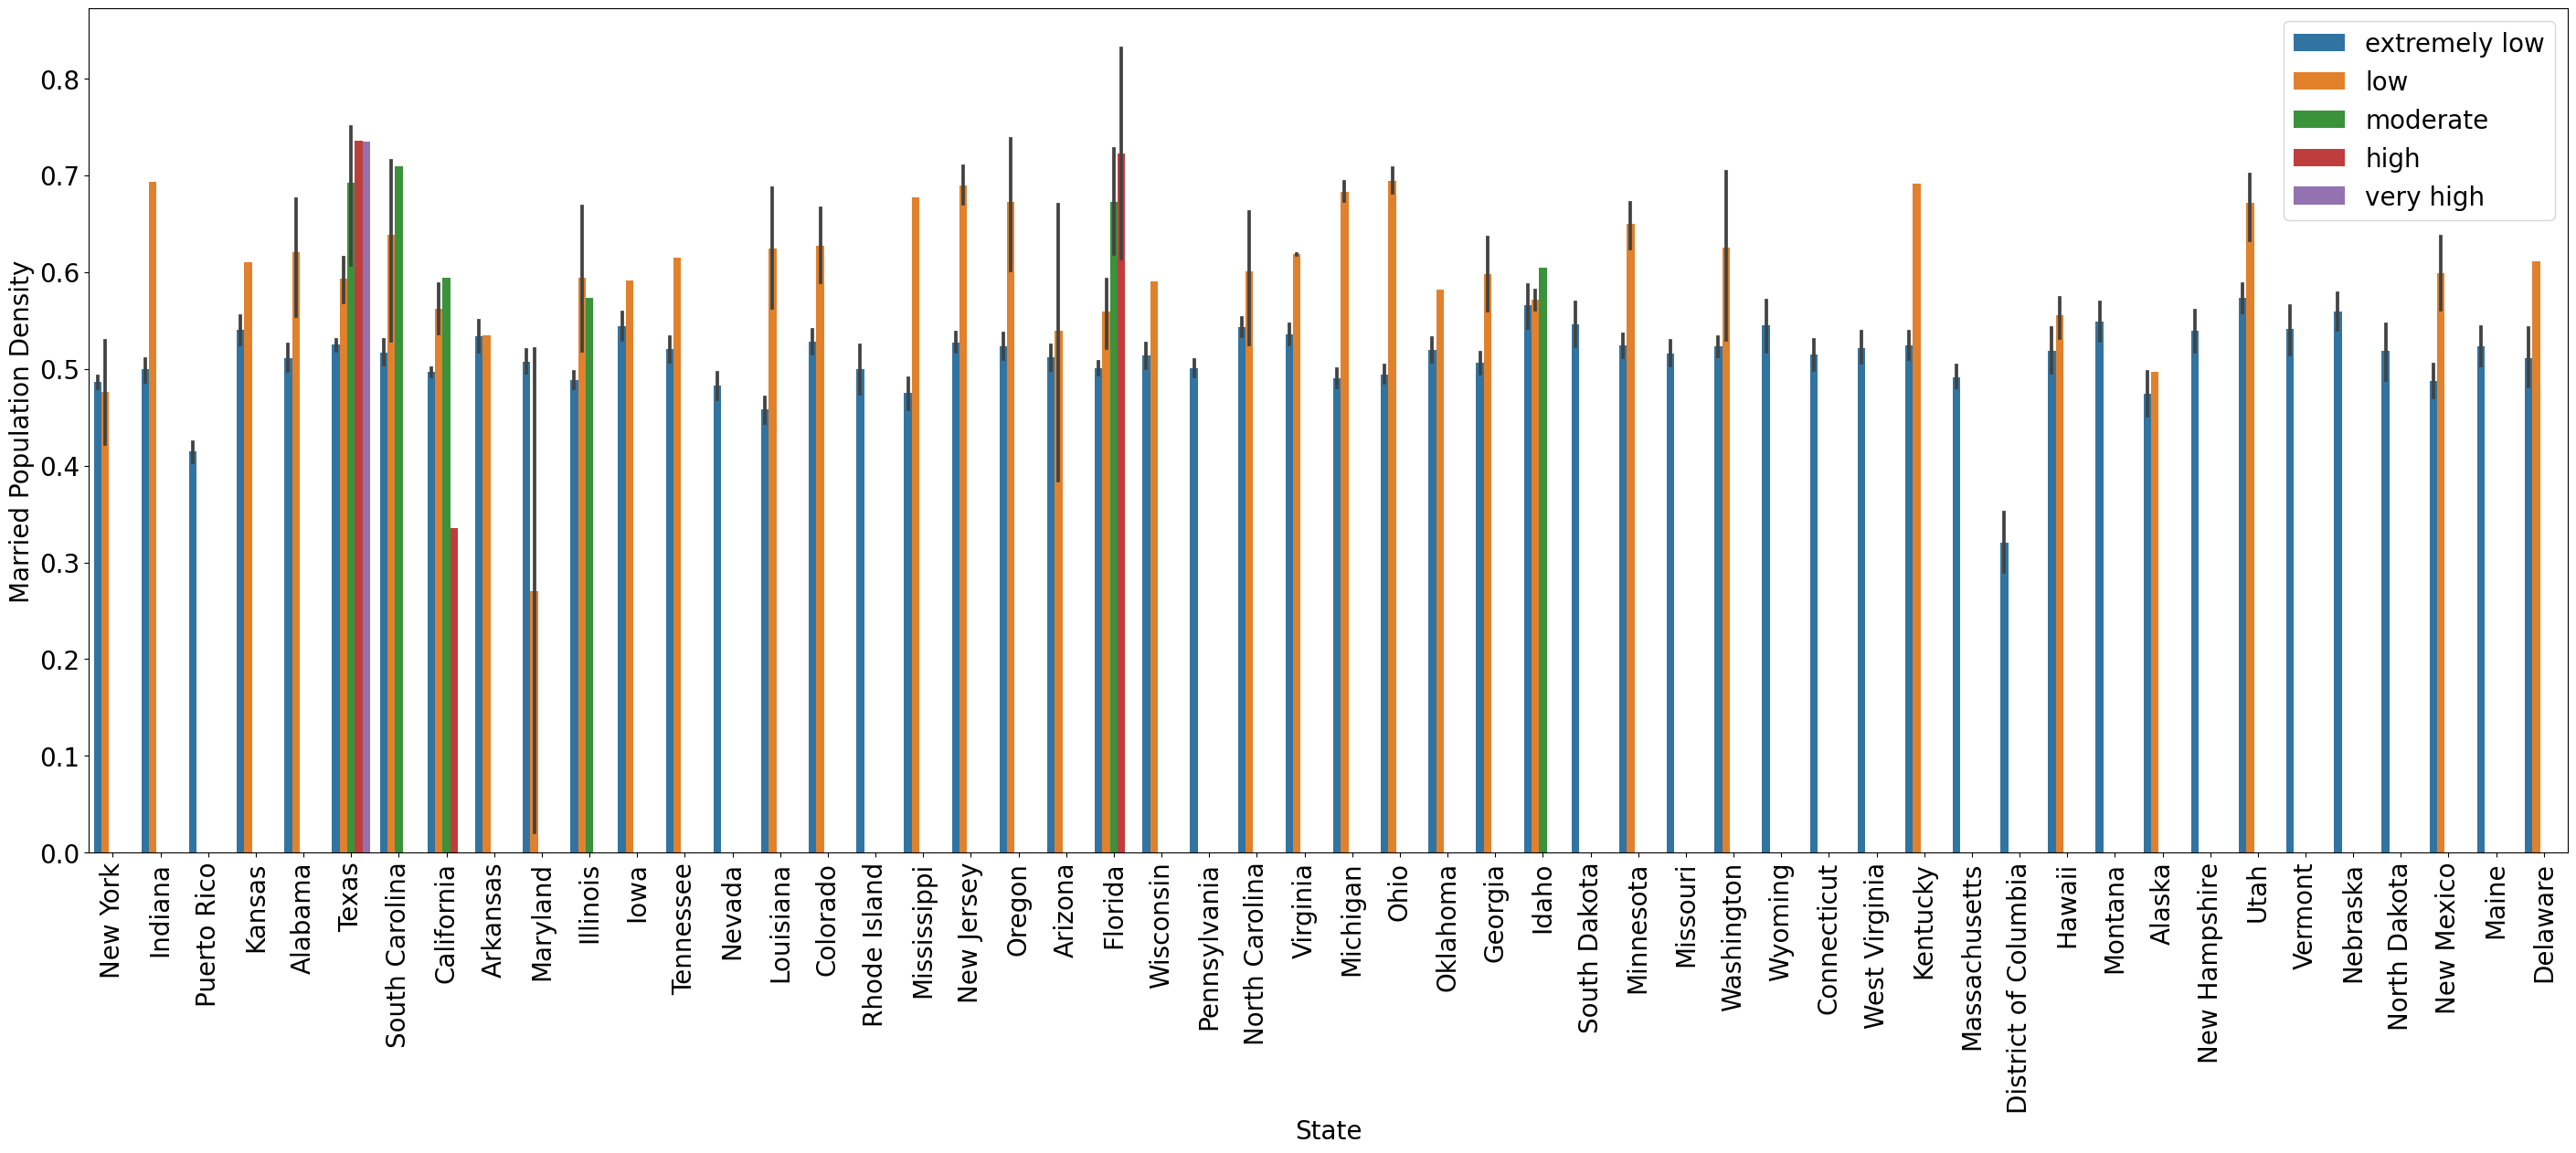

In [46]:
plt.figure(figsize=(35,12))
ax = sns.barplot(x='state', y='married', hue='pop_bin', data=train_ds)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("State",fontsize=20)
plt.ylabel("Married Population Density",fontsize=20)
plt.legend(fontsize=20)
plt.show()

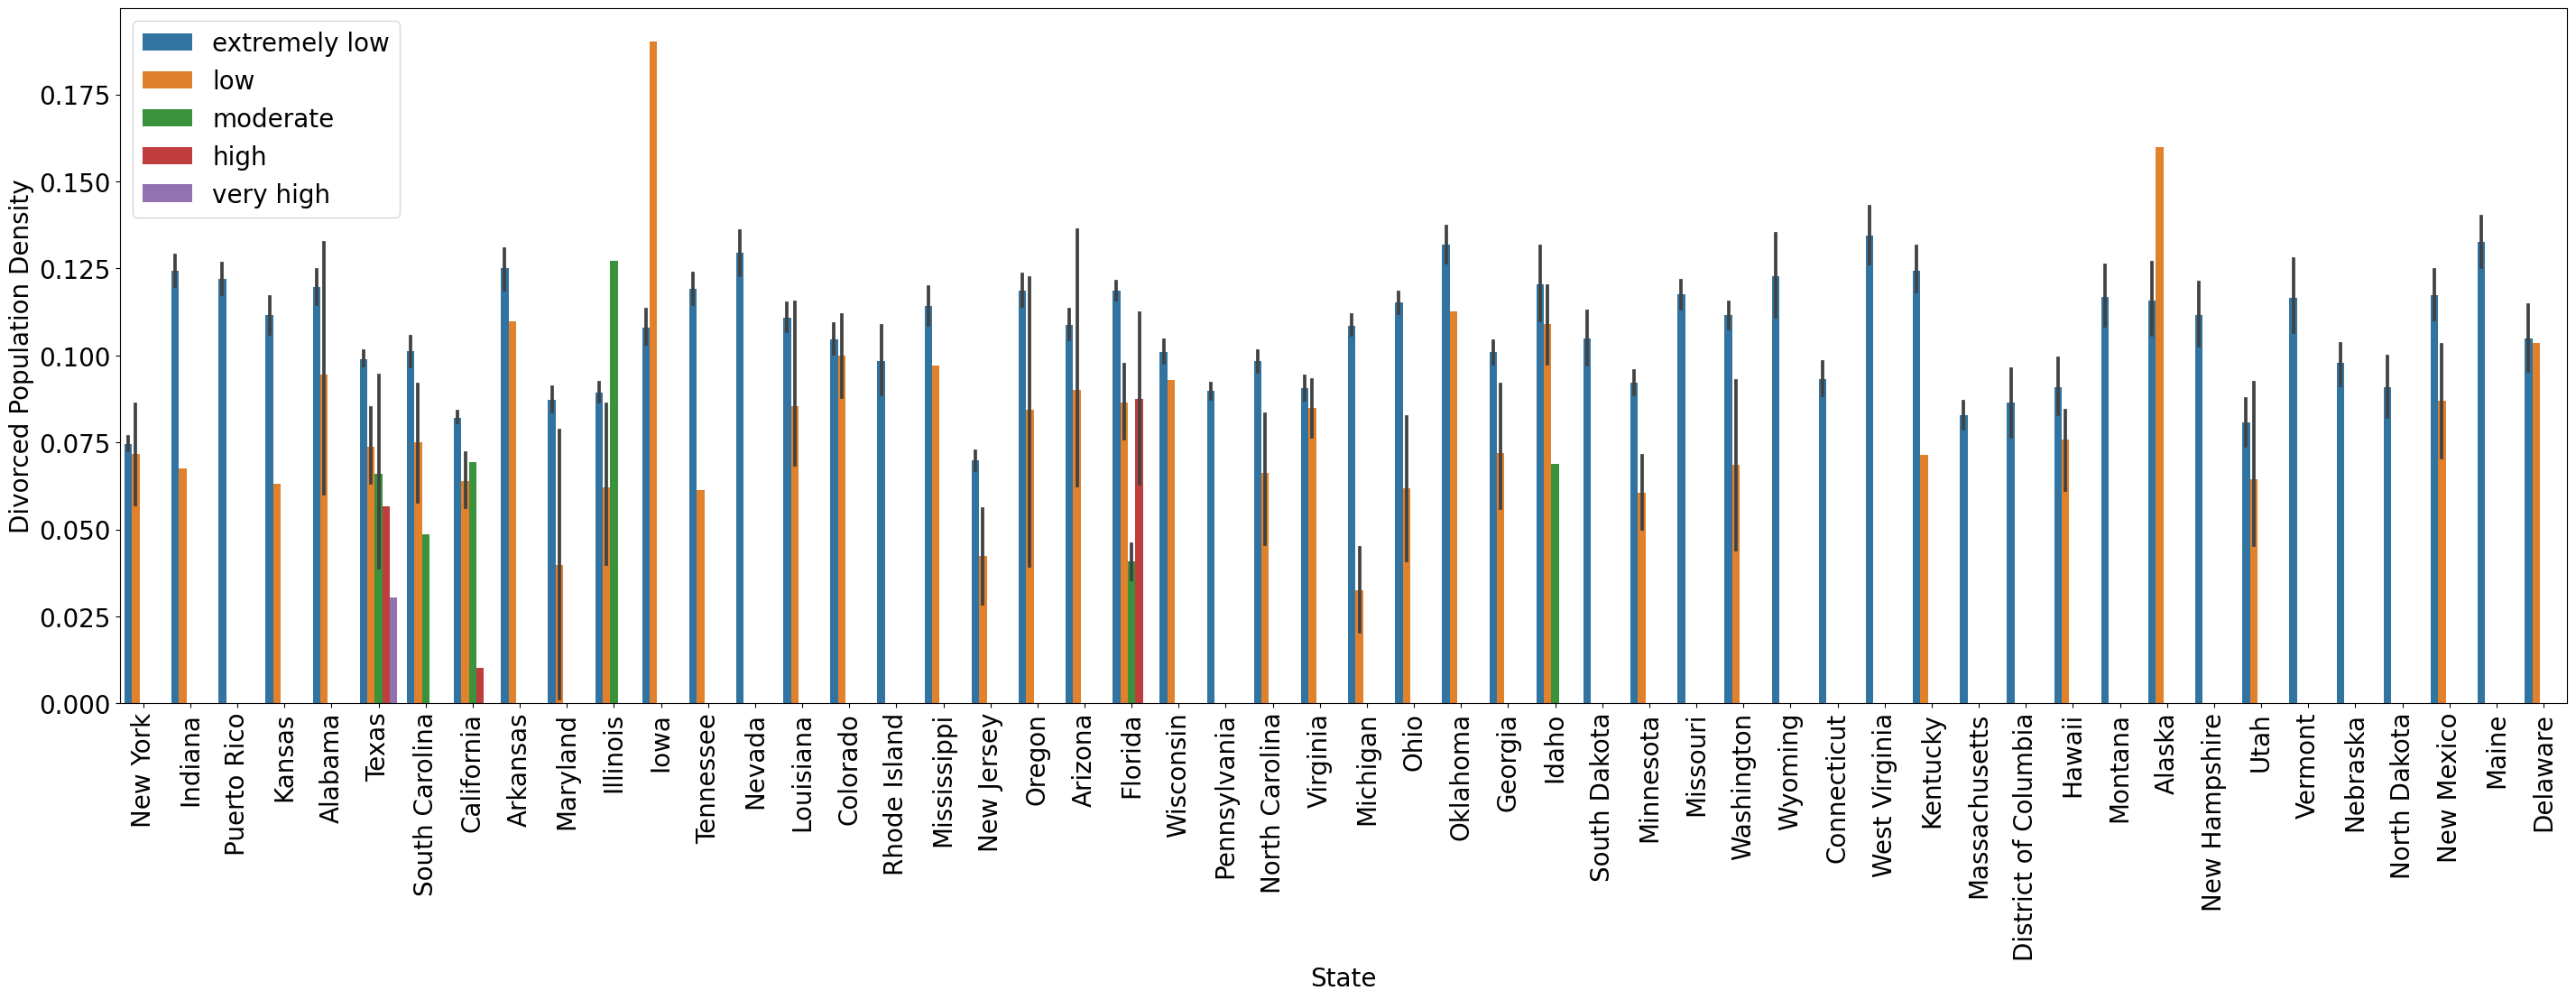

In [47]:
plt.figure(figsize=(35,10))
ax = sns.barplot(x='state', y='divorced', hue='pop_bin', data=train_ds)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("State",fontsize=20)
plt.ylabel("Divorced Population Density",fontsize=20)
plt.legend(fontsize=20)
plt.show()

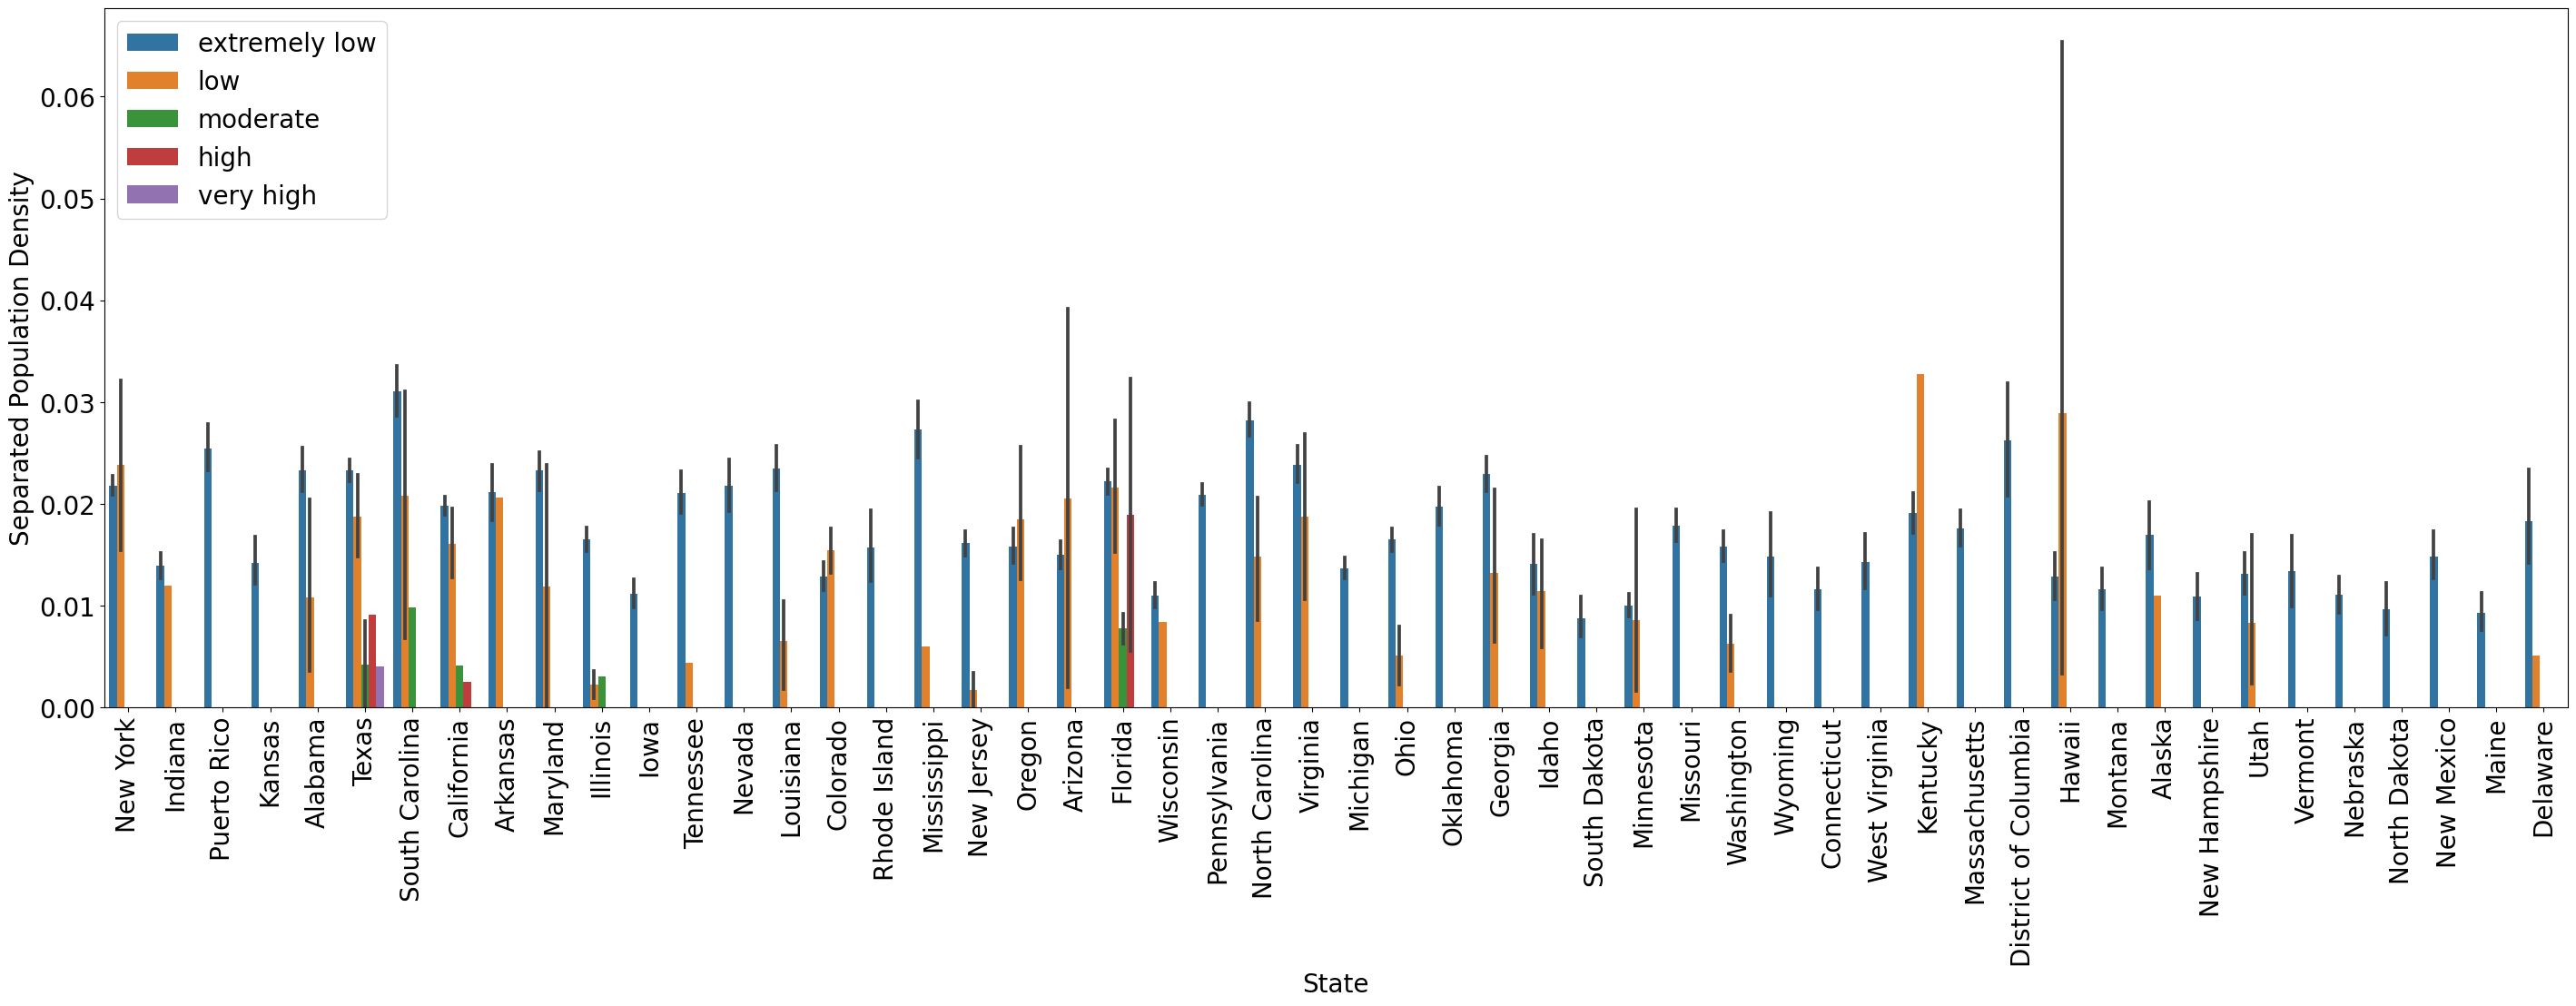

In [48]:
plt.figure(figsize=(35,10))
ax = sns.barplot(x='state', y='separated', hue='pop_bin', data=train_ds)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("State",fontsize=20)
plt.ylabel("Separated Population Density",fontsize=20)
plt.legend(fontsize=20)
plt.show()

### 7. Please detail your observations for rent as a percentage of income at an overall level, and for different states.

In [49]:
import statistics
train_ds['rent_pct_income'] = (train_ds['rent_mean']/train_ds['family_mean'])*100
print(statistics.mean(train_ds.rent_pct_income))

1.4118608336613738


#### Average rent for all the states is 1.411 percent of income

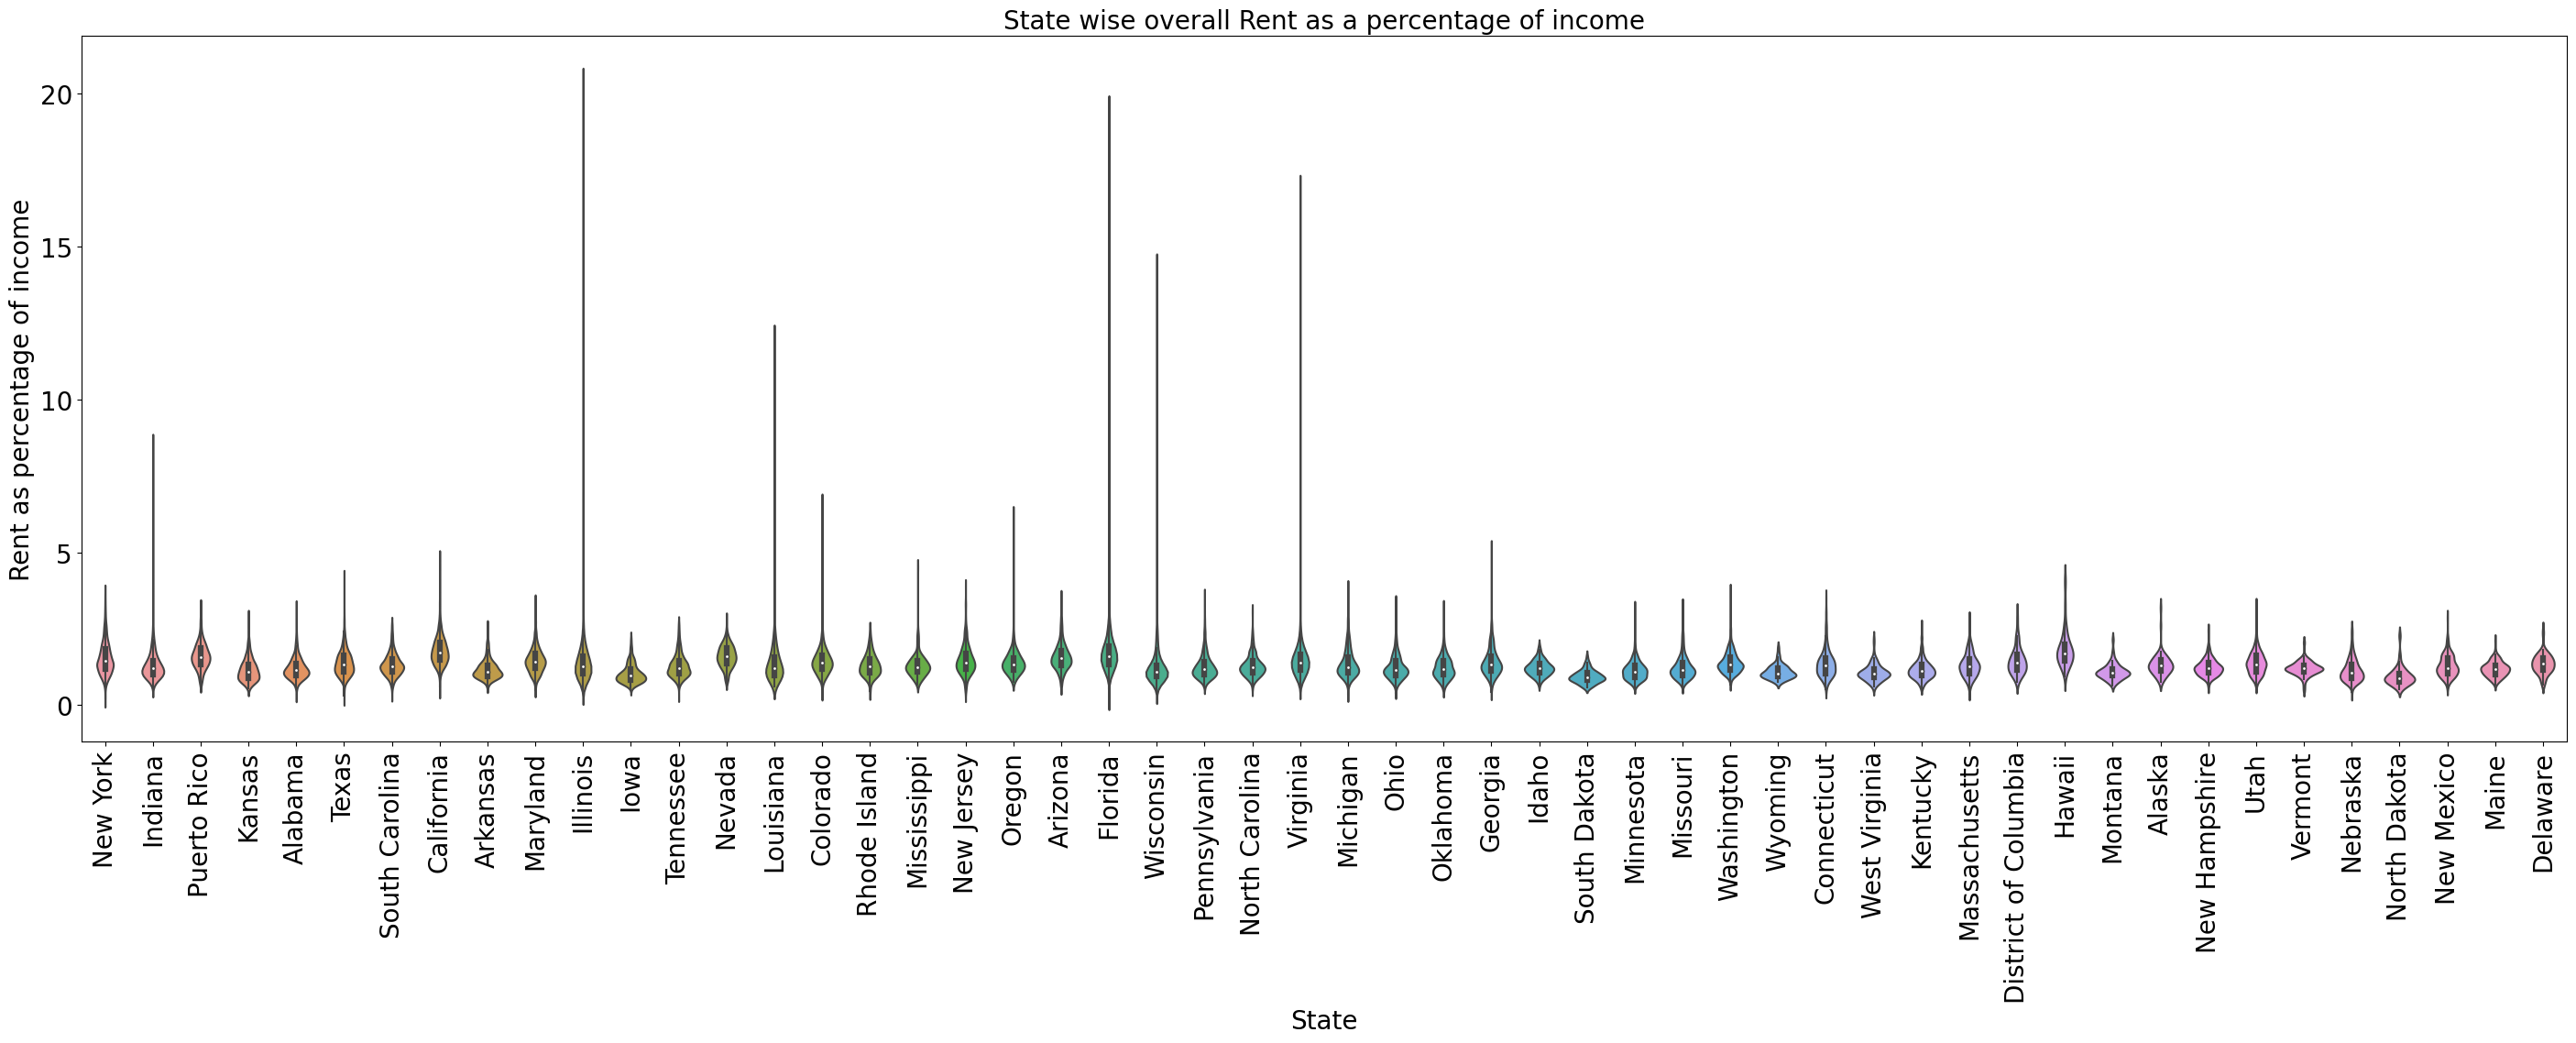

In [50]:
plt.figure(figsize=(35,10))
sns.violinplot(x='state', y='rent_pct_income', data=train_ds)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("State", fontsize=20)
plt.ylabel("Rent as percentage of income", fontsize=20)
plt.title("State wise overall Rent as a percentage of income", fontsize=20)
plt.show()

#### Indiana, Illinois, Louisiana, Florida, Wisconsin, Virginia has larger band of rent as percentage of income

### 8.	Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.

In [51]:
train_ds.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater', 'pop',
       'male_pop', 'female_pop', 'rent_mean', 'rent_median', 'rent_stdev',
       'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_degree_

We have multiple column which represent similar thing, for ex- pop, male_pop, female_pop , similarly 'family_mean', 'family_median', 'family_stdev'. So let's pick one such column in similar category for correlation analysis

C:\Users\selpa\AppData\Local\Temp\ipykernel_18776\1349931168.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'hs_degree','debt','male_age_mean','female_age_mean','home_equity']].corr(),annot=True)


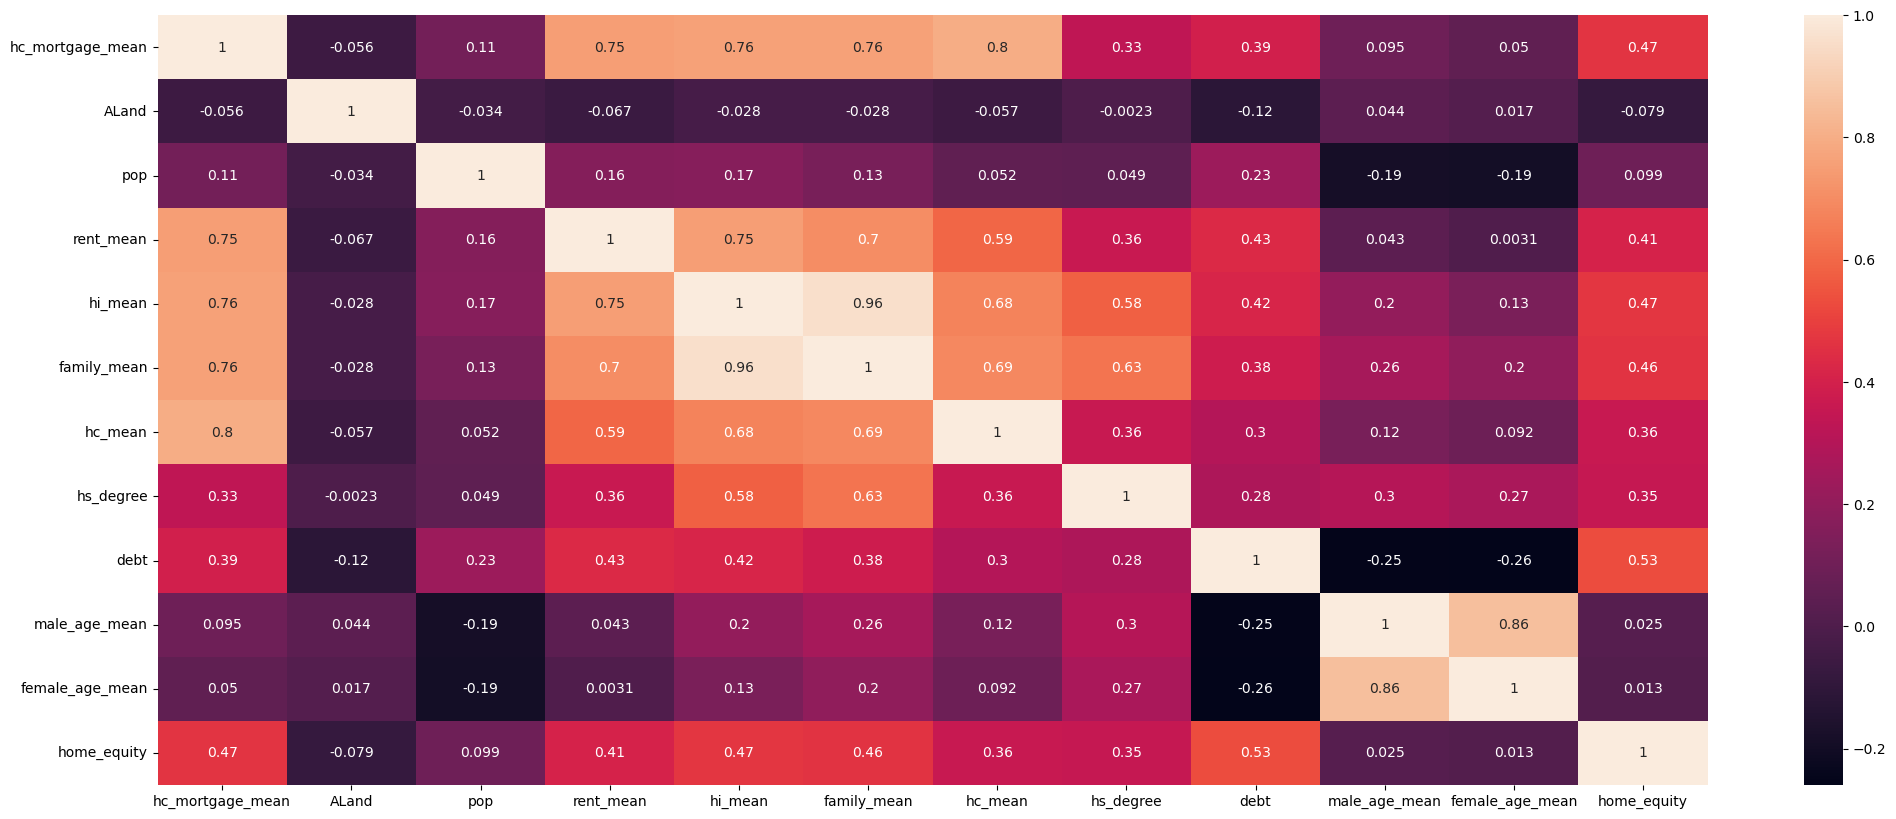

In [52]:
plt.figure(figsize=(25,10))
sns.heatmap(data=train_ds[['hc_mortgage_mean','state','ALand','pop','rent_mean','hi_mean','family_mean','hc_mean',
                           'hs_degree','debt','male_age_mean','female_age_mean','home_equity']].corr(),annot=True)
plt.show()

#### Correlation Observations
1. hc_mortgage_mean has good correlation with 'rent_mean', 'hi_mean', 'family_mean'- that means mortgage is higher when average rent in that area is high, when household income and family income is high in any geographical location
2. Household income and family income is correlated, mainly because they depend on each other
3. hc_mean i.e monthly cost of living is correlated to the household income and family income
4. hs_degree is correlated to family income - that suggests - areas with more people with eduction has higher family income


## Data Pre-processing:

#### 1.	The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. 

Latent Variables are :

•	Highschool graduation rates

•	Median population age

•	Second mortgage statistics

•	Percent own

•	Bad debt expense


So we have 5 latent variables, we will need to oberve these 5 factors on related columns. and see which factors it is loading to 

In [53]:
from factor_analyzer import FactorAnalyzer

In [54]:
fa = FactorAnalyzer(n_factors = 5)

In [55]:
train_factor_ds=train_ds[['hs_degree','hs_degree_male','hs_degree_female',
                          'male_age_mean','male_age_median','female_age_mean','female_age_median',
                          'home_equity_second_mortgage', 'second_mortgage','second_mortgage_cdf',
                          'debt_cdf','debt',
                          'pct_own']]
fa.fit(train_factor_ds)
loadings = fa.loadings_

In [56]:
Factors  = pd.DataFrame.from_records(loadings)

In [57]:
Factors.index = train_factor_ds.columns
Factors.columns = ["Median population age","Highschool graduation rates", 
                   "Second mortgage statistics", "Bad debt expense", "Percent own"]
Factors

,Median population age,Highschool graduation rates,Second mortgage statistics,Bad debt expense,Percent own
hs_degree,-0.040264,1.040835,-0.001428,0.031637,0.013238
hs_degree_male,-0.022636,0.953856,-0.005040,-0.010682,0.033297
hs_degree_female,0.001436,0.938712,0.002428,0.031970,-0.019872
male_age_mean,0.943260,-0.063110,-0.005097,0.082423,-0.044151
male_age_median,0.970074,-0.105189,-0.002542,0.041582,-0.233363
female_age_mean,0.980432,-0.001673,0.000633,0.004510,0.442229
female_age_median,0.975565,-0.008355,0.004033,-0.014177,0.294636
home_equity_second_mortgage,-0.054912,-0.020486,0.957934,0.061242,0.011950
second_mortgage,-0.042125,-0.031949,1.022398,0.060801,0.012138
second_mortgage_cdf,-0.087893,-0.048777,-0.688228,0.118579,0.022799


#### We can see that degree related columns 'hs_degree','hs_degree_male','hs_degree_female', have high loadings for factor"Highschool graduation rates" 

#### Age related columns 'male_age_mean','male_age_median','female_age_mean','female_age_median', have high loadings for "Median population age"

#### second mortgage related columns 'home_equity_second_mortgage', 'second_mortgage','second_mortgage_cdf', have high loadings for "Second mortgage statistics"

#### debt expense related columns 'debt_cdf','debt', have high loadings for Bad debt expense

However Percentage owned has no good loadings for any factor

In [58]:
xvals = range(1, train_factor_ds.shape[1]+1)

In [59]:
# Check Eigenvalues
ev, v = fa.get_eigenvalues()

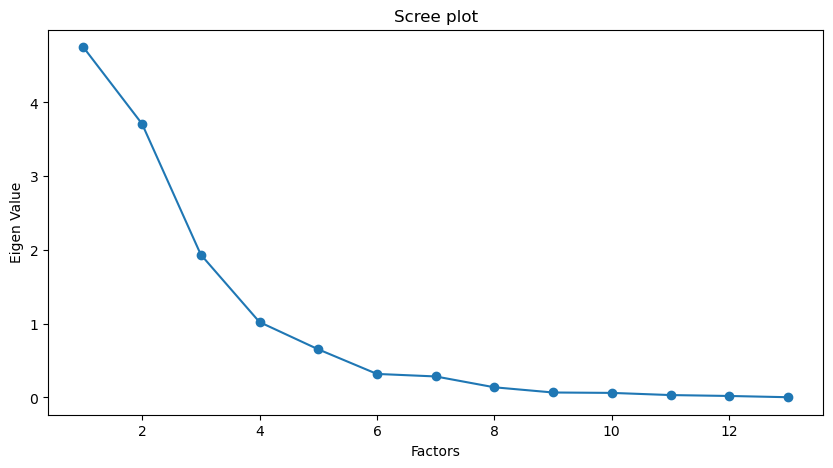

In [60]:
plt.figure(figsize = (10,5))
plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.show()

We considered 13 columns for analysis so here we can see 13 points, for factors we can see that the curve starts to become flat after 5th point or 6th point, which tells us that instead of all 13 parameters we can utilize 5 factors which will explain the dataset nearly same as compared to 13 columns

### Data Modeling :

3.	Build a linear Regression model to predict the total monthly expenditure for home mortgages loan. 
       Please refer deplotment_RE.xlsx. Column hc_mortgage_mean is predicted variable. This is the mean monthly mortgage and owner costs of specified geographical location.
       Note: Exclude loans from prediction model which have NaN (Not a Number) values for hc_mortgage_mean. 
       a) Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.
       b) Run another model at State level. There are 52 states in USA.
       c) Keep below considerations while building a linear regression model:
•	Variables should have significant impact on predicting Monthly mortgage and owner costs<br>
•	Utilize all predictor variable to start with initial hypothesis<br>
•	R square of 60 percent and above should be achieved<br>
•	Ensure Multi-collinearity does not exist in dependent variables<br>
•	Test if predicted variable is normally distributed<br>


We need to start with all the variables solet's load the dataset again and run basic cleaning 

In [61]:
train_set = pd.read_csv("Real_estate_train.csv")
test_set = pd.read_csv("Real_estate_test.csv")

In [62]:
train_set.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [63]:
train_set.isnull().sum()

UID                0
BLOCKID        27321
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
pct_own          268
married          191
married_snp      191
separated        191
divorced         191
Length: 80, dtype: int64

In [64]:
train_set.drop(columns=['BLOCKID', 'SUMLEVEL', 'primary'], axis=1, inplace=True)
test_set.drop(columns=['BLOCKID', 'SUMLEVEL', 'primary'], axis=1, inplace=True)

In [65]:
train_set.isna().sum()

UID              0
COUNTYID         0
STATEID          0
state            0
state_ab         0
              ... 
pct_own        268
married        191
married_snp    191
separated      191
divorced       191
Length: 77, dtype: int64

In [66]:
test_set.isna().sum()

UID              0
COUNTYID         0
STATEID          0
state            0
state_ab         0
              ... 
pct_own        122
married         84
married_snp     84
separated       84
divorced        84
Length: 77, dtype: int64

In [67]:
train_set.dropna(inplace=True)
test_set.dropna(inplace=True)

In [68]:
print(train_set.isna().sum())
print("---------------------------------------------")
print(test_set.isna().sum())

UID            0
COUNTYID       0
STATEID        0
state          0
state_ab       0
              ..
pct_own        0
married        0
married_snp    0
separated      0
divorced       0
Length: 77, dtype: int64
---------------------------------------------
UID            0
COUNTYID       0
STATEID        0
state          0
state_ab       0
              ..
pct_own        0
married        0
married_snp    0
separated      0
divorced       0
Length: 77, dtype: int64


In [69]:
print(r"shape of train dataset is :",train_set.shape)
print(r"shape of train dataset is :",test_set.shape)

shape of train dataset is : (26585, 77)
shape of train dataset is : (11355, 77)


In [70]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26585 entries, 0 to 27320
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          26585 non-null  int64  
 1   COUNTYID                     26585 non-null  int64  
 2   STATEID                      26585 non-null  int64  
 3   state                        26585 non-null  object 
 4   state_ab                     26585 non-null  object 
 5   city                         26585 non-null  object 
 6   place                        26585 non-null  object 
 7   type                         26585 non-null  object 
 8   zip_code                     26585 non-null  int64  
 9   area_code                    26585 non-null  int64  
 10  lat                          26585 non-null  float64
 11  lng                          26585 non-null  float64
 12  ALand                        26585 non-null  float64
 13  AWater          

In [71]:
train_set.head()

,UID,COUNTYID,STATEID,state,state_ab,city,place,type,zip_code,area_code,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,53,36,New York,NY,Hamilton,Hamilton,City,13346,315,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,141,18,Indiana,IN,South Bend,Roseland,City,46616,574,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,63,18,Indiana,IN,Danville,Danville,City,46122,317,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,927,787,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,161,20,Kansas,KS,Manhattan,Manhattan City,City,66502,785,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [72]:
import numpy as np
df_cat = train_set.select_dtypes(include = object)
df_num = train_set.select_dtypes(exclude=object)
print("Categorical variables:-\n",df_cat.columns)
print("--------------------------------------------")
print("Numerical variables:-\n",df_num.columns)

Categorical variables:-
 Index(['state', 'state_ab', 'city', 'place', 'type'], dtype='object')
--------------------------------------------
Numerical variables:-
 Index(['UID', 'COUNTYID', 'STATEID', 'zip_code', 'area_code', 'lat', 'lng',
       'ALand', 'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean',
       'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples',
       'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30',
       'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'universe_samples',
       'used_samples', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight',
       'hi_samples', 'family_mean', 'family_median', 'family_stdev',
       'family_sample_weight', 'family_samples', 'hc_mortgage_mean',
       'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight',
       'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples',
       'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage',
       'home_equ

### •	Variables should have significant impact on predicting Monthly mortgage and owner costs 
Let's Find out which variables have significant impact on "Monthly mortgage and owner costs" i.e hc_mortgage_mean

In [73]:
target_Col = 'hc_mortgage_mean'

In [74]:
corr_train_set = train_set.corr()[[target_Col]]
filter_corr_train_set = corr_train_set[(corr_train_set[target_Col]>0.5)|(corr_train_set[target_Col]<-0.5)]
print(filter_corr_train_set)


C:\Users\selpa\AppData\Local\Temp\ipykernel_18776\756365523.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_train_set = train_set.corr()[[target_Col]]


                    hc_mortgage_mean
rent_mean                   0.763246
rent_median                 0.724977
rent_stdev                  0.644523
hi_mean                     0.781409
hi_median                   0.735851
hi_stdev                    0.792245
family_mean                 0.775282
family_median               0.751456
family_stdev                0.732122
hc_mortgage_mean            1.000000
hc_mortgage_median          0.987560
hc_mortgage_stdev           0.808373
hc_mean                     0.803234
hc_median                   0.777460
hc_stdev                    0.625571


We can see that rent related columns and income related columns have significant impact on "hc_mortgage_mean", so these variables/columns should be included in our model for preiction

### •	Ensure Multi-collinearity does not exist in dependent variables
We can see that "hc_mortgage_mean", "hc_mortgage_median" and "hc_mortgage_stdev" have significant correlation, so we should use only one of the variable as dependent variable , I am selecting "hc_mortgage_mean"

### Test if predicted variable is normally distributed
Let's plot a density graph to check distribution of "hc_mortgage_mean"

<Figure size 3500x1000 with 0 Axes>

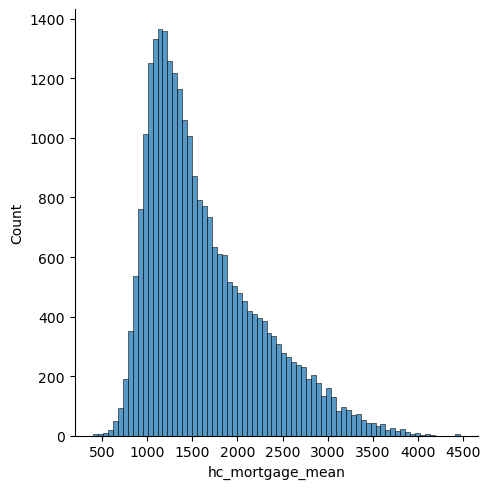

In [75]:
plt.figure(figsize=(35,10))
sns.displot(train_set['hc_mortgage_mean'])
plt.show()

from the plot We can see that "hc_mortgage_mean" is not notmally distributed, instead it is positively skewed

Remove categorical columns and the columns which does not contribute to prediction, also the columns which represent similar information as target variable

In [76]:
col_to_drop=['COUNTYID','UID','state','state_ab', 'city','place','type','zip_code','area_code','lat','lng','hc_mortgage_median','hc_mortgage_stdev','hc_mean','hc_median','hc_stdev']
train_set.drop(col_to_drop, axis=1, inplace=True)
test_set.drop(col_to_drop, axis=1, inplace=True)

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [78]:
train_y = train_set['hc_mortgage_mean']
train_x = train_set.drop(columns=['hc_mortgage_mean'])

In [79]:
lr=LinearRegression()

In [80]:
lr.fit(train_x, train_y)

LinearRegression()

In [81]:
test_y=test_set['hc_mortgage_mean']
test_x=test_set.drop(columns=['hc_mortgage_mean'])

In [82]:
train_set_prediction = lr.predict(train_x)
test_set_prediction = lr.predict(test_x)

In [83]:
mse = mean_squared_error(train_y, train_set_prediction)
mae = mean_absolute_error(train_y, train_set_prediction)
r2=r2_score(train_y, train_set_prediction)

print("Model performance evaluation for train dataset:")
print("**********************************************")
print("Mean squared Error is  :",round(mse,3))
print("Mean absolute Error is :", round(mae,3))
print("R2 Square is           :", round(r2,3))

Model performance evaluation for train dataset:
**********************************************
Mean squared Error is  : 56171.244
Mean absolute Error is : 166.607
R2 Square is           : 0.854


In [84]:
mse = mean_squared_error(test_y, test_set_prediction)
mae = mean_absolute_error(test_y, test_set_prediction)
r2=r2_score(test_y, test_set_prediction)

print("Model performance evaluation for test dataset:")
print("**********************************************")
print("Mean squared Error is  :",round(mse,3))
print("Mean absolute Error is :", round(mae,3))
print("R2 Square is           :", round(r2,3))


Model performance evaluation for test dataset:
**********************************************
Mean squared Error is  : 59923.199
Mean absolute Error is : 169.695
R2 Square is           : 0.85


Our Target R2 score is 60% and We have a good R2 square of 85% . So let's skip the analysis on STATEID

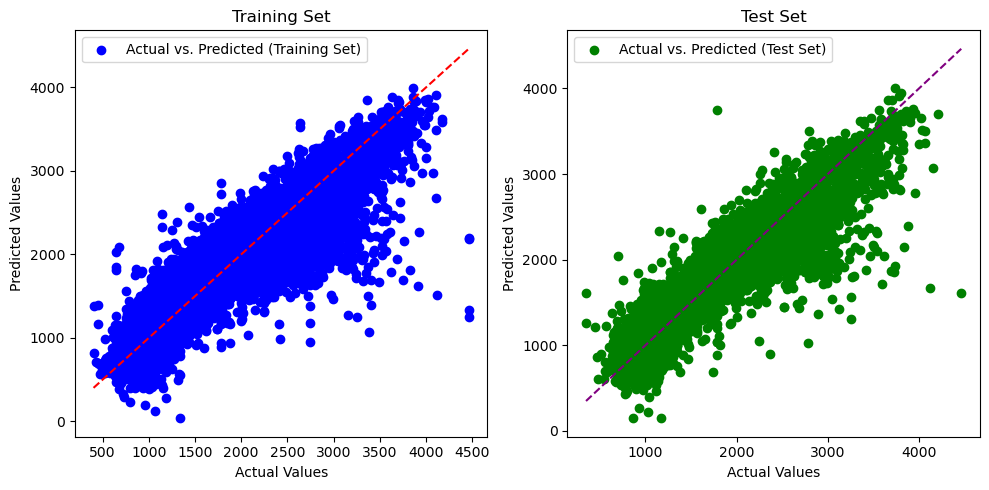

In [85]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(train_y, train_set_prediction, color='blue', label='Actual vs. Predicted (Training Set)')
plt.plot([min(train_y), max(train_y)], [min(train_y), max(train_y)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Training Set')

plt.subplot(1, 2, 2)
plt.scatter(test_y, test_set_prediction, color='green', label='Actual vs. Predicted (Test Set)')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='purple',linestyle="--")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Test Set')

plt.tight_layout()
plt.show()